In [1]:
# libraries 
import os  
import numpy as np 
import seaborn as sns 
import cv2 
import tensorflow as tf  
import matplotlib.pyplot as plt 
import time 
from tqdm import tqdm
from sklearn.metrics import classification_report, confusion_matrix   

# -------------------------------------------------- Training dataset ------------------------------------------------

In [2]:
labels = ['glioma','meningioma','notumor','pituitary']     

X_train = []
y_train = []
image_size = 299

for i in labels:
    folderPath = os.path.join('./DataSet','Training',i)
    for j in tqdm(os.listdir(folderPath)):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size, image_size))
        X_train.append(img)
        y_train.append(i)

for i in labels:
    folderPath = os.path.join('./DataSet','Testing',i)
    for j in tqdm(os.listdir(folderPath)):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        y_train.append(i)

X_train = np.array(X_train)
y_train = np.array(y_train)

100%|██████████| 300/300 [00:00<00:00, 414.90it/s]


In [3]:
def visualize(history): 

    tr_acc = history.history['accuracy']
    tr_loss = history.history['loss']
    val_acc = history.history['val_accuracy']
    val_loss = history.history['val_loss']
    index_loss = np.argmin(val_loss)
    val_lowest = val_loss[index_loss]
    index_acc = np.argmax(val_acc)
    acc_highest = val_acc[index_acc]

    Epochs = [i+1 for i in range(len(tr_acc))]
    loss_label = f'best epoch= {str(index_loss + 1)}'
    acc_label = f'best epoch= {str(index_acc + 1)}'

    # Plot training history
    plt.figure(figsize= (20, 8))
    plt.style.use('fivethirtyeight')

    # Training and Validation Loss
    plt.subplot(1, 2, 1)
    plt.plot(Epochs, tr_loss, 'r', label= 'Training loss')
    plt.plot(Epochs, val_loss, 'g', label= 'Validation loss')
    plt.scatter(index_loss + 1, val_lowest, s= 150, c= 'blue', label= loss_label)
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Training and Validation Accuracy
    plt.subplot(1, 2, 2)
    plt.plot(Epochs, tr_acc, 'r', label= 'Training Accuracy')
    plt.plot(Epochs, val_acc, 'g', label= 'Validation Accuracy')
    plt.scatter(index_acc + 1 , acc_highest, s= 150, c= 'blue', label= acc_label)
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout
    return plt.show()

In [4]:
def visualize_2(history): 
    tr_acc = history.history['accuracy']
    tr_loss = history.history['loss']
    val_acc = history.history['val_accuracy']
    val_loss = history.history['val_loss']

    index_loss = np.argmin(val_loss)
    val_lowest = val_loss[index_loss]
    index_acc = np.argmax(val_acc)
    acc_highest = val_acc[index_acc]
    Epochs = [i+1 for i in range(len(tr_acc))]
    loss_label = f'best epoch= {str(index_loss + 1)}'
    acc_label = f'best epoch= {str(index_acc + 1)}' 
    
    # Plot training history
    plt.figure(figsize=(20, 8))
    plt.style.use('fivethirtyeight') 
    plt.subplot(1, 2, 1)
    plt.plot(Epochs, tr_loss, 'r', label='Training loss')
    plt.plot(Epochs, val_loss, 'g', label='Validation loss')
    plt.scatter(index_loss + 1, val_lowest, s=150, c='blue', label=loss_label)
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(Epochs, tr_acc, 'r', label='Training Accuracy')
    plt.plot(Epochs, val_acc, 'g', label='Validation Accuracy')
    plt.scatter(index_acc + 1, acc_highest, s=150, c='blue', label=acc_label)
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

In [5]:
def visualize_3 (history): 
    import matplotlib.pyplot as plt
    train_accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']
    train_loss = history.history['loss']
    val_loss = history.history['val_loss']
    plt.figure(figsize=(20, 8))
    plt.subplot(1, 2, 1) 
    #plt.gca().set_ylim([0, 1.0])
    plt.plot(train_accuracy, label='Training Accuracy', color='blue')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Training Accuracy')
    plt.legend()
    # Plot validation accuracy
    plt.subplot(1, 2, 2) 
    #plt.gca().set_ylim([0, 1.0])
    plt.plot(val_accuracy, label='Validation Accuracy', color='orange')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Validation Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()
    # Plot training and validation loss
    plt.figure(figsize=(20, 8))

    # Plot training loss
    plt.subplot(1, 2, 1) 
    #plt.gca().set_ylim([0, 1.0])
    plt.plot(train_loss, label='Training Loss', color='blue')
    plt.xlabel('Epoch')
    plt.ylabel('Loss') 
    plt.title('Training Loss')
    plt.legend()

    # Plot validation loss
    plt.subplot(1, 2, 2) 
    #plt.gca().set_ylim([0, 1.0])
    plt.plot(val_loss, label='Validation Loss', color='orange')
    plt.xlabel('Epoch')
    plt.ylabel('Loss') 
    plt.title('Validation Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

# ------------------------------------------- Training  ------------------------------------------ 

In [3]:
from sklearn.utils import shuffle 
X_train, y_train = shuffle(X_train,y_train, random_state=101) 

In [4]:
from sklearn.model_selection import train_test_split 
X_train,X_test,y_train,y_test = train_test_split(X_train,y_train, test_size=0.2,random_state=101) 

In [5]:
print(X_train.shape)  
print(X_test.shape )  
print(y_train.shape)  
print(y_test.shape )  

(5436, 299, 299, 3)
(1359, 299, 299, 3)
(5436,)
(1359,)


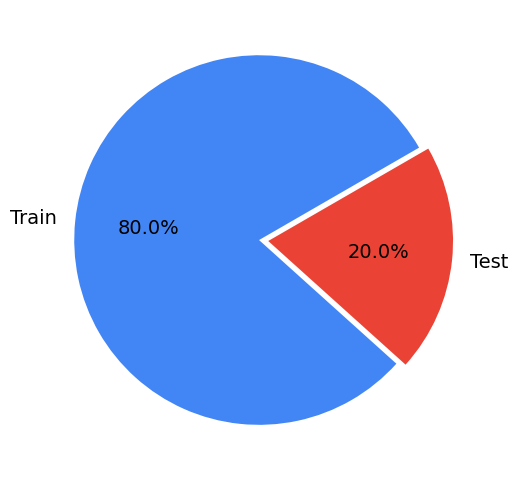

In [6]:
plt.figure(figsize=(14,6))
colors = ['#4285f4', '#ea4335', '#fbbc05', '#34a853']
plt.rcParams.update({'font.size': 14})
plt.pie([len(y_train), len(y_test)],
        labels=['Train','Test'],
        colors=colors, autopct='%.1f%%', explode=(0.05,0),
        startangle=30);

# Normalization

In [7]:
X_train_normalized = X_train / 255.0
X_test_normalized = X_test / 255.0 

In [8]:
# Checking before using
print(f"Maximum and Minimum pixel value: {X_train_normalized.max()} - {X_train_normalized.min()}")  
print(f"Maximum and Minimum pixel value: {X_test_normalized.max()} - {X_test_normalized.min()}") 

Maximum and Minimum pixel value: 1.0 - 0.0
Maximum and Minimum pixel value: 1.0 - 0.0


# One-Hot encoding for labels

In [9]:
labels = ['glioma','meningioma','notumor','pituitary']      
label_to_index = {labels: index for index, labels in enumerate(labels)}
y_train_indices = np.array([label_to_index[labels] for labels in y_train])

# Convert indices to one-hot encoded vectors
y_train_one_encoded = tf.keras.utils.to_categorical(y_train_indices, num_classes=len(labels))

In [10]:
y_train_one_encoded.shape

(5436, 4)

In [11]:
labels = ['glioma','meningioma','notumor','pituitary']       
label_to_index = {labels: index for index, labels in enumerate(labels)}
y_test_indices = np.array([label_to_index[labels] for labels in y_test])

# Convert indices to one-hot encoded vectors
y_test_one_encoded = tf.keras.utils.to_categorical(y_test_indices, num_classes=len(labels))

In [12]:
y_test_one_encoded.shape

(1359, 4)

In [13]:
print("x_train shape",X_train_normalized.shape)
print("x_test shape",X_test_normalized.shape)
print("y_train shape",y_train_one_encoded.shape)
print("y_test shape",y_test_one_encoded .shape)

x_train shape (5436, 299, 299, 3)
x_test shape (1359, 299, 299, 3)
y_train shape (5436, 4)
y_test shape (1359, 4)


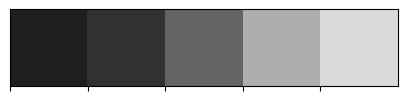

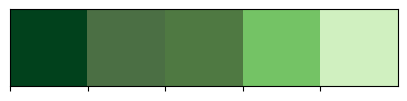

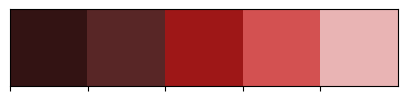

In [17]:
colors_dark = ["#1F1F1F", "#313131", '#636363', '#AEAEAE', '#DADADA']
colors_red = ["#331313", "#582626", '#9E1717', '#D35151', '#E9B4B4']
colors_green = ['#01411C','#4B6F44','#4F7942','#74C365','#D0F0C0'] 

sns.palplot(colors_dark)
sns.palplot(colors_green)
sns.palplot(colors_red)

# -------------------------------------------- Transfer Learning Models -------------------------------------------

##  ////////////////////////////////////////////////////////////  Xception  /////////////////////////////////////////////////////////////////

In [21]:
from tensorflow.keras.applications import Xception 

base_model_Xception = Xception(weights='imagenet', include_top=False, input_shape=(299, 299, 3)) 

NUM_CLASSES = 4   
batch_size = 64
epochs = 50

# Freeze all layers in the base model 
for layer in base_model_Xception.layers:
    layer.trainable = False 
    
# add global average pooling layer
x = base_model_Xception.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(1024, activation='relu')(x) 

# output layer
outputlayer_Xception = tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')(x)   

#creating new model
model_Xception = tf.keras.Model(inputs=base_model_Xception.input, outputs=outputlayer_Xception) 

# Compile model
model_Xception.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])   

In [3]:
model_Xception.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 299, 299,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1        │ (None, 149, 149,  │        864 │ input_layer[0][0] │
│ (Conv2D)            │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1_bn     │ (None, 149, 149,  │        128 │ block1_conv1[0][… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1_act    │ (None, 149, 149,  │          0 │ block1_conv1_bn[… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2        │ (None, 147, 147,  │     18,432 │ block1_conv1_act… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2_bn     │ (None, 147, 147,  │        256 │ block1_conv2[0][… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2_act    │ (None, 147, 147,  │          0 │ block1_conv2_bn[… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv1     │ (None, 147, 147,  │      8,768 │ block1_conv2_act… │
│ (SeparableConv2D)   │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv1_bn  │ (None, 147, 147,  │        512 │ block2_sepconv1[… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2_act │ (None, 147, 147,  │          0 │ block2_sepconv1_… │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2     │ (None, 147, 147,  │     17,536 │ block2_sepconv2_… │
│ (SeparableConv2D)   │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2_bn  │ (None, 147, 147,  │        512 │ block2_sepconv2[… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 74, 74,    │      8,192 │ block1_conv2_act… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_pool         │ (None, 74, 74,    │          0 │ block2_sepconv2_… │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 74, 74,    │        512 │ conv2d[0][0]      │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 74, 74,    │          0 │ block2_pool[0][0… │
│                     │ 128)              │            │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block3_sepconv1_act │ (None, 74, 74,    │          0 │ add[0][0]       

 Total params: 22,963,756 (87.60 MB)

 Trainable params: 2,102,276 (8.02 MB)

 Non-trainable params: 20,861,480 (79.58 MB)

In [17]:
starting_time = time.time()  

history_Xception = model_Xception.fit(X_train_normalized, y_train_one_encoded, epochs=epochs, verbose=1, validation_data=(X_test_normalized, y_test_one_encoded), shuffle=False, batch_size=batch_size)  
 
ending_time = time.time()  

total_run_time = ending_time - starting_time
print("Total runtime of model:", total_run_time/60, "Seconds") 

Epoch 1/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 205s 2s/step - accuracy: 0.7623 - loss: 0.5981 - val_accuracy: 0.8948 - val_loss: 0.2839
Epoch 2/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 200s 2s/step - accuracy: 0.9184 - loss: 0.2291 - val_accuracy: 0.9132 - val_loss: 0.2606
Epoch 3/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 194s 2s/step - accuracy: 0.9383 - loss: 0.1743 - val_accuracy: 0.9176 - val_loss: 0.2355
Epoch 4/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 190s 2s/step - accuracy: 0.9476 - loss: 0.1484 - val_accuracy: 0.9294 - val_loss: 0.2062
Epoch 5/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 189s 2s/step - accuracy: 0.9495 - loss: 0.1395 - val_accuracy: 0.8779 - val_loss: 0.3319
Epoch 6/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 189s 2s/step - accuracy: 0.9468 - loss: 0.1405 - val_accuracy: 0.8992 - val_loss: 0.2694
Epoch 7/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 189s 2s/step - accuracy: 0.9621 - loss: 0.0986 - val_accuracy: 0.9029 - val_loss: 0.2568
Epoch 8/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 190s 2s/step - accuracy: 0.9752 - loss: 0.0768 - val_accuracy: 0.9213 - v

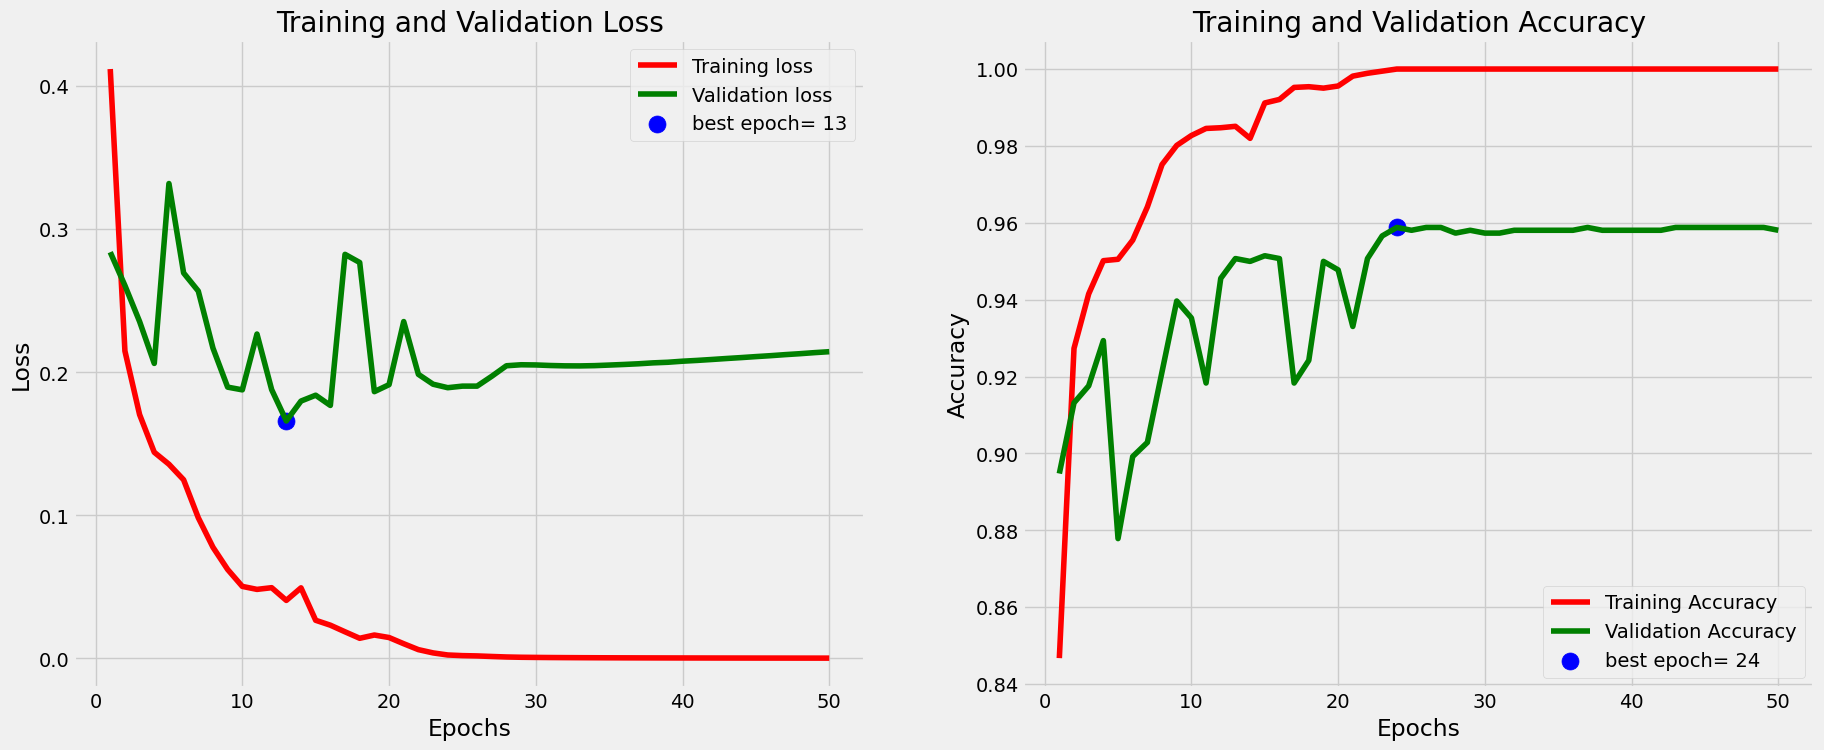

In [73]:
# Visualize first time
visualize(history_Xception)

# ------------------------------------------- Evaluate Xception model ----------------------------------------------

In [19]:
# Evaluation
test_loss, test_acc = model_Xception.evaluate(X_test_normalized, y_test_one_encoded)  # X_test_normalized, y_test_one_encoded
print("Test Accuracy: {:.2f}%".format(test_acc * 100))
print("Test Loss: {:.2f}%".format(test_loss * 100))

43/43 ━━━━━━━━━━━━━━━━━━━━ 38s 869ms/step - accuracy: 0.9602 - loss: 0.1891
Test Accuracy: 95.81%
Test Loss: 21.94%


In [20]:
# prediction
y_pred = model_Xception.predict(X_test_normalized)  # X_test_normalized
y_pred = np.argmax(y_pred,axis=1) 

43/43 ━━━━━━━━━━━━━━━━━━━━ 37s 855ms/step


In [21]:
y_test_new = np.argmax(y_test_one_encoded,axis=1)  # y_test_one_encoded

## Classification Report
0 - Glioma
1 - meningioma
2 - No tumor
3 - Pituitary 

In [22]:
print(classification_report(y_test_new,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.92      0.94       340
           1       0.89      0.93      0.91       292
           2       0.98      0.99      0.99       378
           3       0.99      0.98      0.98       349

    accuracy                           0.96      1359
   macro avg       0.96      0.96      0.96      1359
weighted avg       0.96      0.96      0.96      1359



## Confusion Matrix

In [23]:
confusion_matrix(y_test_new, y_pred)

array([[312,  26,   0,   2],
       [ 11, 273,   5,   3],
       [  0,   3, 375,   0],
       [  1,   5,   1, 342]], dtype=int64)

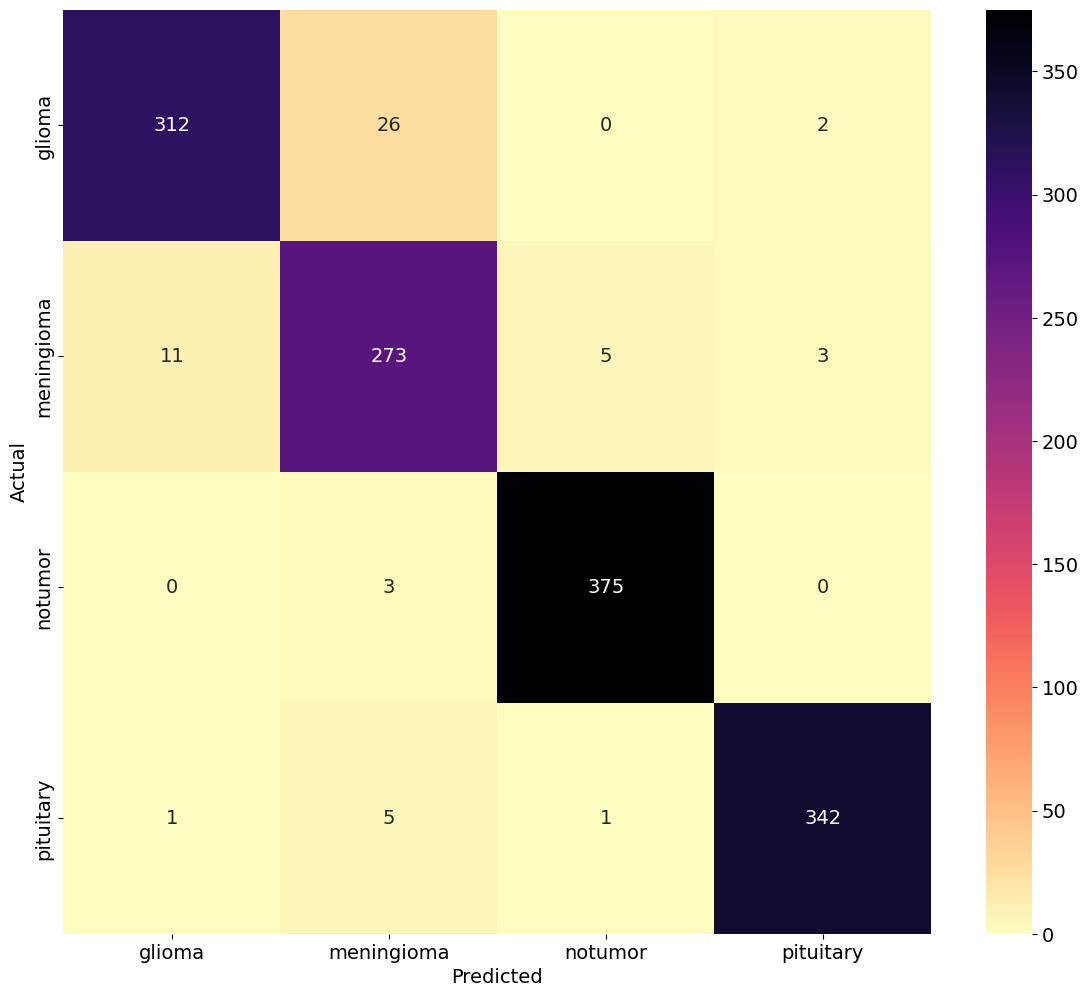

In [18]:
# Define class labels
labels = ['glioma', 'meningioma', 'notumor', 'pituitary']

# Define the confusion matrix data
confusion_matrix = np.array([[312, 26, 0, 2],
                              [11, 273, 5, 3],
                              [ 0, 3, 375, 0],
                              [ 1, 5, 1, 342]])

# Plot confusion matrix
plt.figure(figsize=(14, 12))
sns.heatmap(confusion_matrix, annot=True, cmap='magma_r', fmt='g', 
            xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

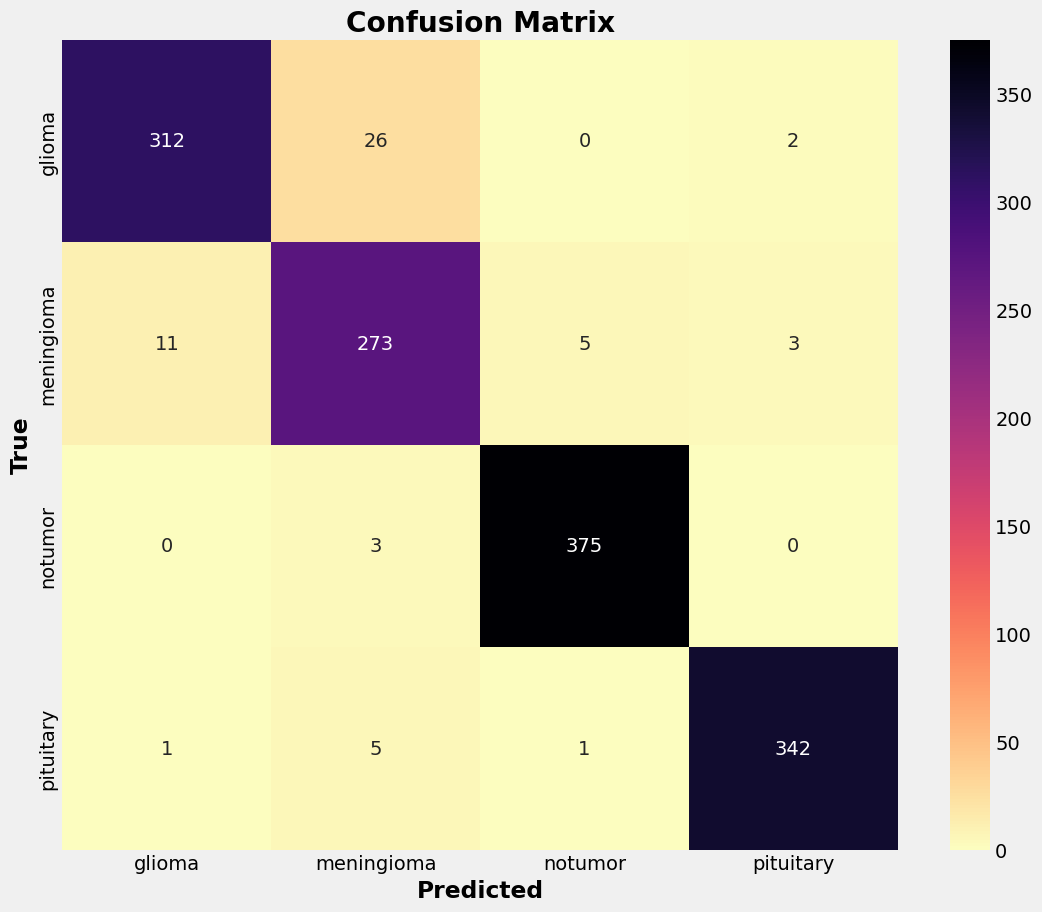

In [24]:
conf_matrix = confusion_matrix(y_test_new,y_pred) # x=y_test_new, y=y_pred

plt.figure(figsize=(12, 10))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='magma_r', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted', fontweight='bold')
plt.ylabel('True', fontweight='bold')
plt.title('Confusion Matrix', fontweight='bold')
plt.show() 

# Model Save

In [25]:
# saving the model 
from keras.saving import save_model
save_model(model_Xception, 'saved_model_Xception_2.keras') 

In [14]:
# Loading model 
from keras.models import load_model 
model_modelXception = load_model('saved_model_Xception_2.keras')

c:\Users\Talha\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\saving\saving_lib.py:396: UserWarning: Skipping variable loading for optimizer 'adam', because it has 318 variables whereas the saved optimizer has 10 variables. 
  trackable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 533ms/step


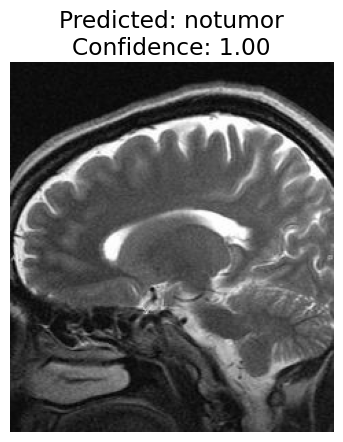

In [29]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Load your pre-trained model
model = load_model('saved_model_Xception_2.keras')

# Function to preprocess the image
def preprocess_image(image_path, target_size):
    img = load_img(image_path, target_size=target_size)
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array / 255.0
    return img_array

# Path to the image you want to predict
image_path = 'DataSet//Testing//notumor//Te-no_0013.jpg'
target_size = (299, 299)  # Change this to match your model's expected input size

# Preprocess the image
img_array = preprocess_image(image_path, target_size)

# Predict the class
predictions = model.predict(img_array)
predicted_class = np.argmax(predictions, axis=1)
confidence = np.max(predictions)

# Assuming 'labels' is a list of class names corresponding to the model's output indices
labels = ['glioma', 'meningioma', 'notumor', 'pituitary']
  # Replace with your actual class labels
predicted_label = labels[predicted_class[0]]

# Display the image with the predicted label and confidence
img = mpimg.imread(image_path)
plt.imshow(img)
plt.title(f'Predicted: {predicted_label}\nConfidence: {confidence:.2f}')
plt.axis('off')
plt.show()

<>:19: SyntaxWarning: invalid escape sequence '\T'
<>:19: SyntaxWarning: invalid escape sequence '\T'
<>:19: SyntaxWarning: invalid escape sequence '\T'
<>:19: SyntaxWarning: invalid escape sequence '\T'
C:\Users\Talha\AppData\Local\Temp\ipykernel_5312\3406228660.py:19: SyntaxWarning: invalid escape sequence '\T'
  image_paths = ['DataSet//Testing//meningioma//image(7).jpg ','DataSet//Testing//meningioma//image(96).jpg' ,'DataSet_2 which is first\Training\glioma\gg (41).jpg','DataSet\Testing\pituitary\Te-pi_0024.jpg']
C:\Users\Talha\AppData\Local\Temp\ipykernel_5312\3406228660.py:19: SyntaxWarning: invalid escape sequence '\T'
  image_paths = ['DataSet//Testing//meningioma//image(7).jpg ','DataSet//Testing//meningioma//image(96).jpg' ,'DataSet_2 which is first\Training\glioma\gg (41).jpg','DataSet\Testing\pituitary\Te-pi_0024.jpg']
c:\Users\Talha\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\saving\saving_lib.py:396: UserWarning: Skipping variable loading for opti

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


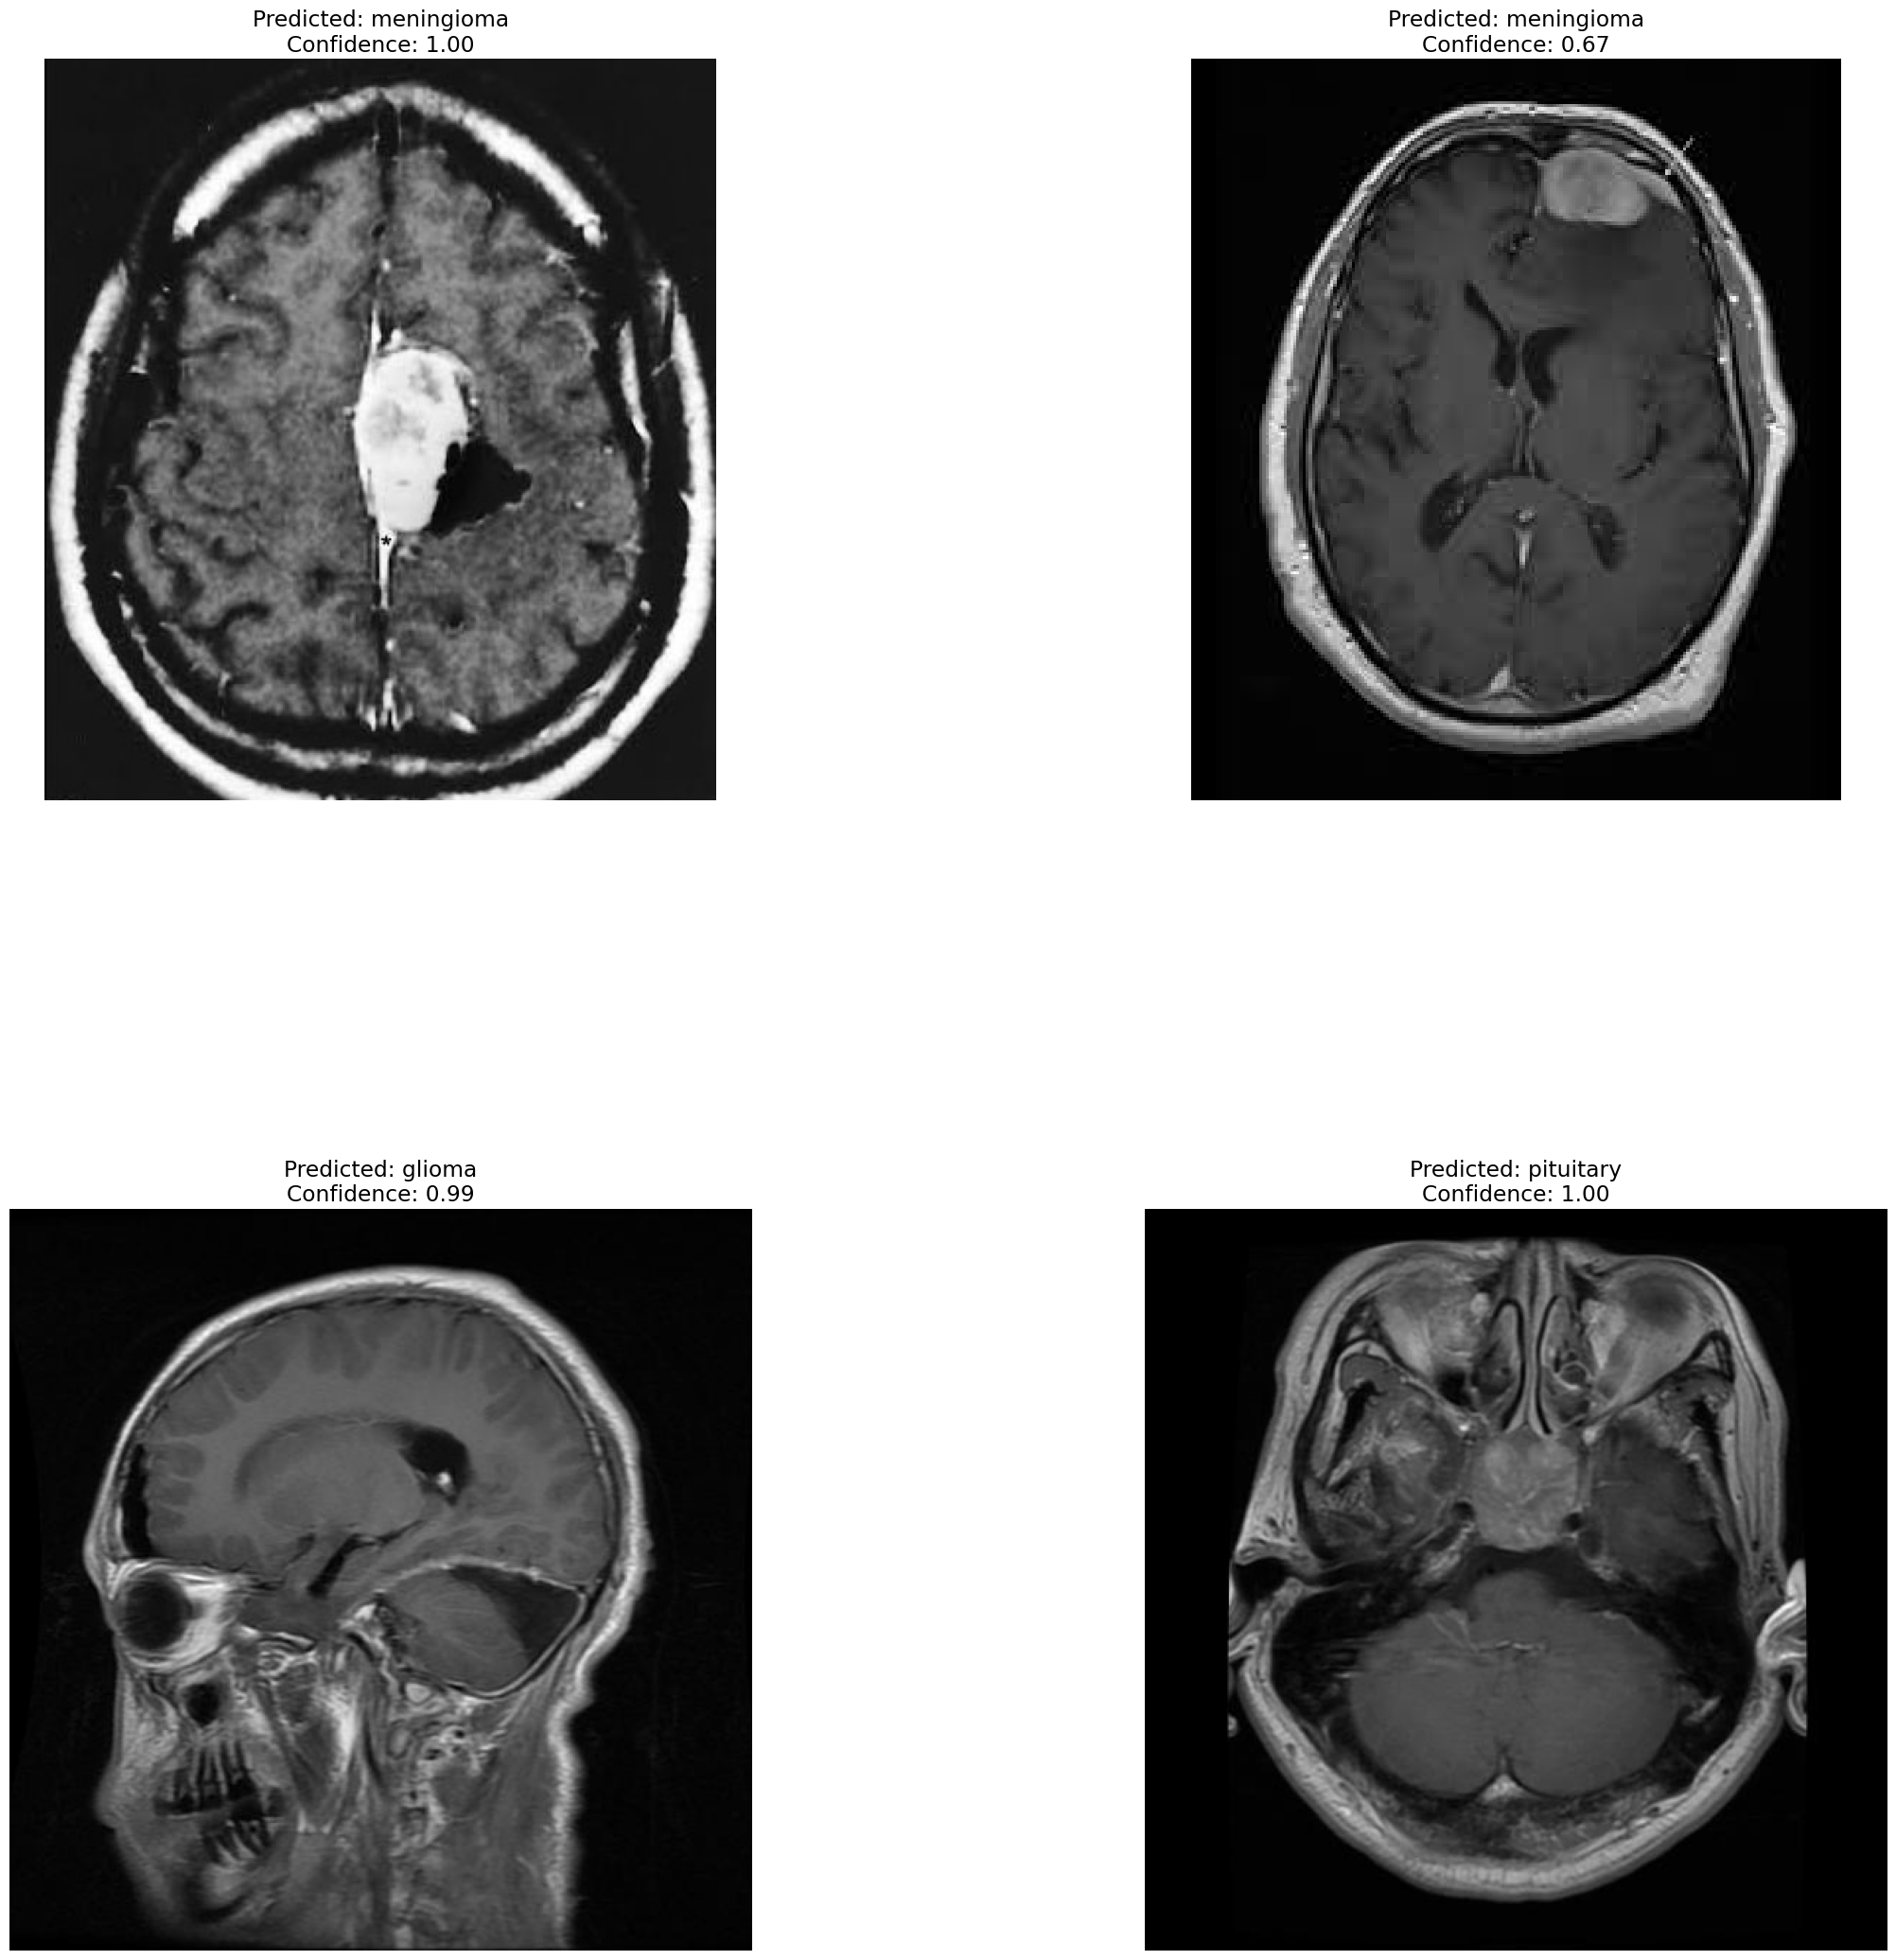

In [20]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Load your pre-trained model
model = load_model('saved_model_Xception_2.keras')

# Function to preprocess the image
def preprocess_image(image_path, target_size):
    img = load_img(image_path, target_size=target_size)
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array / 255.0
    return img_array

# List of image paths you want to predict
image_paths = ['DataSet//Testing//meningioma//image(7).jpg ','DataSet//Testing//meningioma//image(96).jpg' ,'DataSet_2 which is first\Training\glioma\gg (41).jpg','DataSet\Testing\pituitary\Te-pi_0024.jpg']

# Assuming 'labels' is a list of class names corresponding to the model's output indices
labels = ['glioma', 'meningioma', 'notumor', 'pituitary']  # Replace with your actual class labels

# Determine grid size
num_images = len(image_paths)
grid_size = int(np.ceil(np.sqrt(num_images)))
f, ax = plt.subplots(grid_size, grid_size)
f.set_size_inches(20, 20)

# Loop through the image paths, predict, and display
img_idx = 0
for i in range(grid_size):
    for j in range(grid_size):
        if img_idx >= num_images:
            ax[i, j].axis('off')  # Turn off any unused subplots
            continue
        
        image_path = image_paths[img_idx]
        img_array = preprocess_image(image_path, target_size=(299, 299))  # Change target_size if needed

        # Predict the class
        predictions = model.predict(img_array)
        predicted_class = np.argmax(predictions, axis=1)
        confidence = np.max(predictions)

        predicted_label = labels[predicted_class[0]]
        
        # Display the image with the predicted label and confidence
        img = mpimg.imread(image_path)
        ax[i, j].imshow(img)
        ax[i, j].set_title(f'Predicted: {predicted_label}\nConfidence: {confidence:.2f}')
        ax[i, j].axis('off')
        
        img_idx += 1

# Adjust layout
plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0.5, hspace=0.55)
plt.show()


# Feature Extractor

In [22]:
from keras.models import Model 
second_last_layer_output = model_modelXception.layers[-2].output

feature_extractor_1 = Model(inputs=model_modelXception.input, outputs=second_last_layer_output)  

# feature_extractor_1.summary()

In [23]:
extracted_feature_Xception = feature_extractor_1.predict(X_train_normalized)

170/170 ━━━━━━━━━━━━━━━━━━━━ 147s 860ms/step


In [24]:
extracted_feature_Xception.shape

(5436, 1024)

In [25]:
extracted_feature_Xception_T = feature_extractor_1.predict(X_test_normalized)

43/43 ━━━━━━━━━━━━━━━━━━━━ 39s 903ms/step


In [26]:
extracted_feature_Xception_T.shape

(1359, 1024)

##  ////////////////////////////////////////////////////////////  InceptionV3  ///////////////////////////////////////////////////////////////

In [27]:
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Model

# Main model 
base_model_InceptionV3 = InceptionV3(weights='imagenet', include_top=False, input_shape=(299, 299, 3))

NUM_CLASSES = 4   
batch_size = 64
epochs = 50

# Freeze the layers in the base model
for layer in base_model_InceptionV3.layers:
    layer.trainable = False

# add global average pooling layer
x = base_model_InceptionV3.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(1024, activation='relu')(x) 

# output layer
outputlayer_Inceptionv3 = tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')(x)   

# Create the final model
model_InceptionV3 = Model(inputs=base_model_InceptionV3.input, outputs=outputlayer_Inceptionv3)

# Compile the model
model_InceptionV3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])  

In [33]:
# calculating time 
starting_time = time.time() 

history_InceptionV3 = model_InceptionV3.fit(X_train_normalized, y_train_one_encoded, epochs=epochs, verbose=1, validation_data=(X_test_normalized, y_test_one_encoded), shuffle=False, batch_size=batch_size)  

ending_time = time.time()  

total_run_time = ending_time - starting_time
print("Total runtime of model:", total_run_time/60, "min/Seconds") 

Epoch 1/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 92s 1s/step - accuracy: 0.7091 - loss: 0.7906 - val_accuracy: 0.8506 - val_loss: 0.3687
Epoch 2/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 83s 977ms/step - accuracy: 0.8850 - loss: 0.3018 - val_accuracy: 0.8808 - val_loss: 0.2987
Epoch 3/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 83s 974ms/step - accuracy: 0.9098 - loss: 0.2378 - val_accuracy: 0.8926 - val_loss: 0.2696
Epoch 4/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 83s 974ms/step - accuracy: 0.9282 - loss: 0.1958 - val_accuracy: 0.8955 - val_loss: 0.2600
Epoch 5/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 83s 974ms/step - accuracy: 0.9440 - loss: 0.1633 - val_accuracy: 0.9036 - val_loss: 0.2510
Epoch 6/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 83s 975ms/step - accuracy: 0.9542 - loss: 0.1369 - val_accuracy: 0.9036 - val_loss: 0.2511
Epoch 7/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 83s 975ms/step - accuracy: 0.9603 - loss: 0.1174 - val_accuracy: 0.9235 - val_loss: 0.2062
Epoch 8/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 83s 975ms/step - accuracy: 0.9665 - loss: 0.1015 - val_accurac

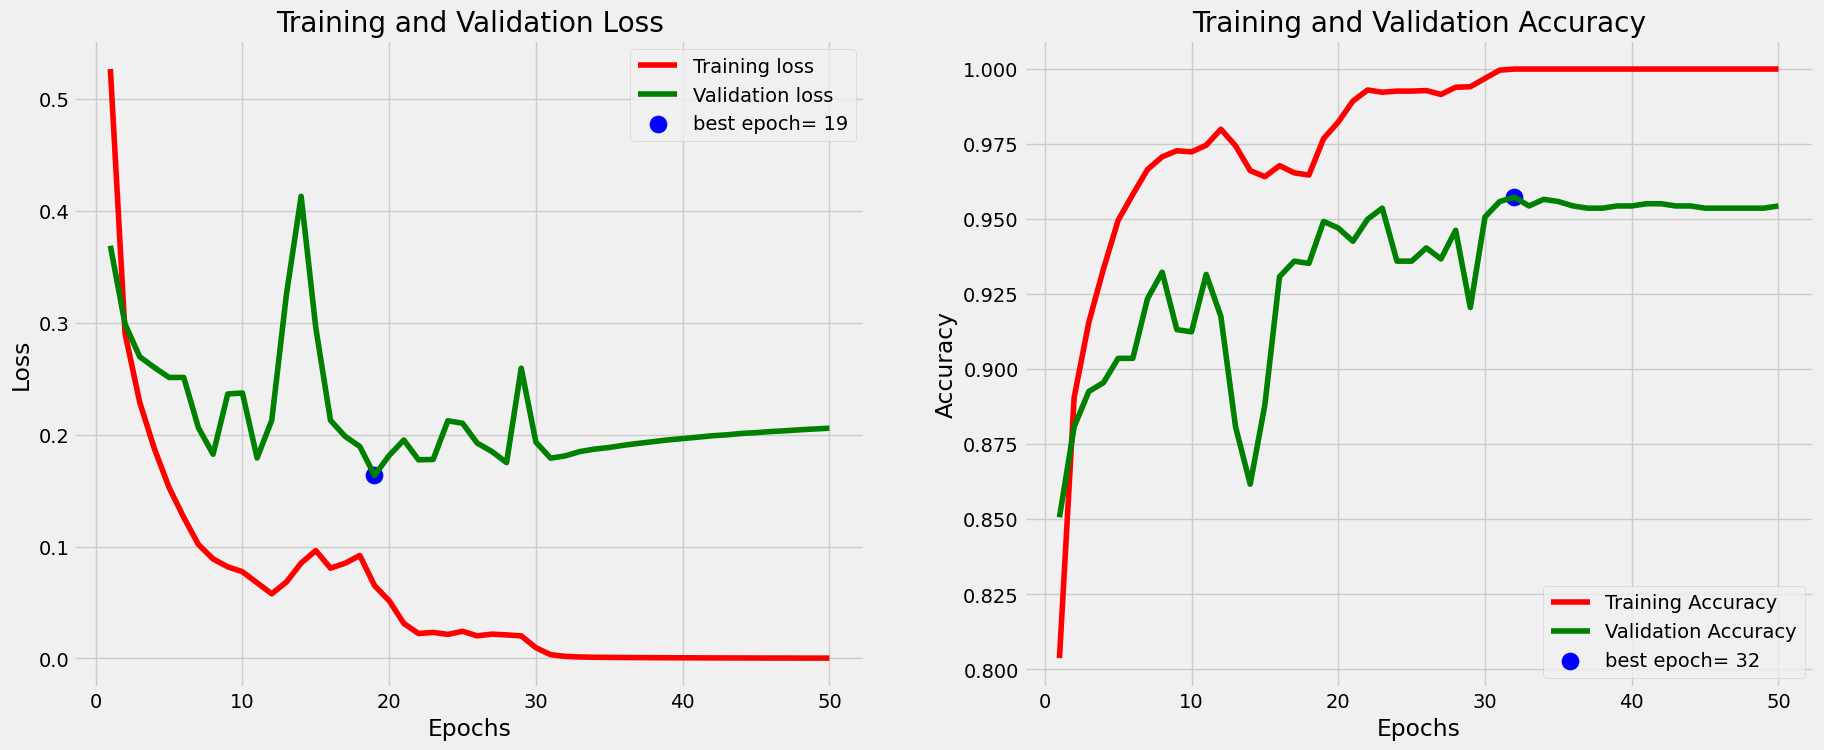

In [74]:
visualize(history_InceptionV3)

# --------------------------------------------- Evaluate InceptionV3 ------------------------------------------------

In [35]:
test_loss, test_acc = model_InceptionV3.evaluate(X_test_normalized, y_test_one_encoded)
print("Test Accuracy: {:.2f}%".format(test_acc * 100)) 
print("Test Loss: {:.2f}%".format(test_loss * 100))

43/43 ━━━━━━━━━━━━━━━━━━━━ 17s 400ms/step - accuracy: 0.9619 - loss: 0.1650
Test Accuracy: 95.44%
Test Loss: 21.04%


## Prediction

In [36]:
y_pred = model_InceptionV3.predict(X_test_normalized)
y_pred = np.argmax(y_pred,axis=1)

43/43 ━━━━━━━━━━━━━━━━━━━━ 18s 405ms/step


In [37]:
y_test_new = np.argmax(y_test_one_encoded,axis=1)

## Classification Report
0 - Glioma
1 - meningioma
2 - No tumor
3 - Pituitary 

In [38]:
print(classification_report(y_test_new,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.93      0.93       340
           1       0.91      0.88      0.90       292
           2       0.98      1.00      0.99       378
           3       0.97      0.99      0.98       349

    accuracy                           0.95      1359
   macro avg       0.95      0.95      0.95      1359
weighted avg       0.95      0.95      0.95      1359



## Confusion Matrix

In [39]:
confusion_matrix(y_test_new, y_pred)

array([[315,  23,   0,   2],
       [ 19, 257,   6,  10],
       [  0,   0, 378,   0],
       [  0,   1,   1, 347]], dtype=int64)

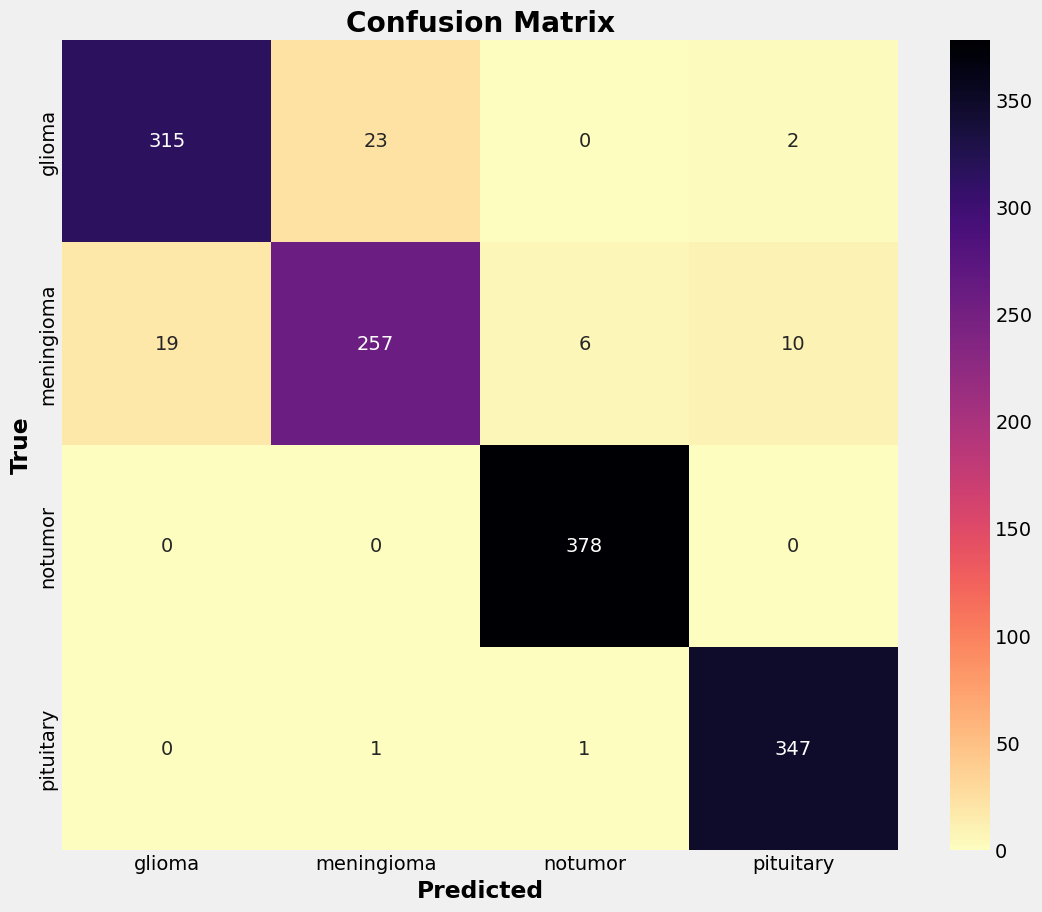

In [40]:
conf_matrix = confusion_matrix(y_test_new,y_pred) # x=y_test_new, y=y_pred

plt.figure(figsize=(12, 10))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='magma_r', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted', fontweight='bold')
plt.ylabel('True', fontweight='bold')
plt.title('Confusion Matrix', fontweight='bold')
plt.show() 

# Saving Model

In [41]:
# saving the model 
from keras.saving import save_model
save_model(model_InceptionV3, 'saved_model_InceptionV3_2.keras') 

In [28]:
# Loading model 
from keras.models import load_model 
model_modelInceptionV3 = load_model('saved_model_InceptionV3_2.keras')

c:\Users\Talha\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\saving\saving_lib.py:396: UserWarning: Skipping variable loading for optimizer 'adam', because it has 386 variables whereas the saved optimizer has 10 variables. 
  trackable.load_own_variables(weights_store.get(inner_path))


In [29]:
from keras.models import Model 
second_last_layer_output = model_modelInceptionV3.layers[-2].output

feature_extractor_2 = Model(inputs=model_modelInceptionV3.input, outputs=second_last_layer_output)  

# feature_extractor_2.summary()

In [30]:
extracted_feature_InceptionV3 = feature_extractor_2.predict(X_train_normalized)

170/170 ━━━━━━━━━━━━━━━━━━━━ 71s 405ms/step


In [31]:
extracted_feature_InceptionV3.shape

(5436, 1024)

In [32]:
extracted_feature_InceptionV3_T = feature_extractor_2.predict(X_test_normalized)

43/43 ━━━━━━━━━━━━━━━━━━━━ 18s 407ms/step


In [33]:
extracted_feature_InceptionV3_T.shape

(1359, 1024)

##  /////////////////////////////////////////////////  DenseNet121  ////////////////////////////////////////////////////

# Resizing images for 224,224 image sizes

In [38]:
labels = ['glioma','meningioma','notumor','pituitary']     

X_train = []
y_train = []
image_size = 224

for i in labels:
    folderPath = os.path.join('./DataSet','Training',i)
    for j in tqdm(os.listdir(folderPath)):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size, image_size))
        X_train.append(img)
        y_train.append(i)

for i in labels:
    folderPath = os.path.join('./DataSet','Testing',i)
    for j in tqdm(os.listdir(folderPath)):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        y_train.append(i)

X_train_1 = np.array(X_train)
y_train_1 = np.array(y_train)

100%|██████████| 300/300 [00:00<00:00, 670.96it/s]


In [39]:
from sklearn.utils import shuffle 
X_train_2, y_train_2 = shuffle(X_train_1,y_train_1, random_state=101) 

In [40]:
from sklearn.model_selection import train_test_split 
X_train,X_test,y_train,y_test = train_test_split(X_train_2,y_train_2, test_size=0.2,random_state=101) 

In [41]:
labels = ['glioma','meningioma','notumor','pituitary']      
label_to_index = {labels: index for index, labels in enumerate(labels)}
y_train_indices = np.array([label_to_index[labels] for labels in y_train])

# Convert indices to one-hot encoded vectors
y_train_one_encoded = tf.keras.utils.to_categorical(y_train_indices, num_classes=len(labels))

In [42]:
labels = ['glioma','meningioma','notumor','pituitary']       
label_to_index = {labels: index for index, labels in enumerate(labels)}
y_test_indices = np.array([label_to_index[labels] for labels in y_test])

# Convert indices to one-hot encoded vectors
y_test_one_encoded = tf.keras.utils.to_categorical(y_test_indices, num_classes=len(labels))

In [43]:
X_train_normalized = X_train / 255.0
X_test_normalized = X_test / 255.0 

In [44]:
print("x_train shape",X_train_normalized.shape)
print("x_test shape",X_test_normalized.shape)
print("y_train shape",y_train_one_encoded.shape)
print("y_test shape",y_test_one_encoded .shape)

x_train shape (5436, 224, 224, 3)
x_test shape (1359, 224, 224, 3)
y_train shape (5436, 4)
y_test shape (1359, 4)


In [34]:
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

# Define base model
base_model_DenseNet121 = DenseNet121(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

NUM_CLASSES = 4
batch_size = 64 
epochs = 50

# Freeze the layers of the base model
for layer in base_model_DenseNet121.layers:
    layer.trainable = False  

# Add global average pooling layer
x = base_model_DenseNet121.output
x = GlobalAveragePooling2D()(x)

# Fully connected layer
x = Dense(1024, activation='relu')(x)  

# Output layer
output_layer_DenseNet121 = Dense(NUM_CLASSES, activation='softmax')(x)  

# Combine model
model_DenseNet121 = Model(inputs=base_model_DenseNet121.input, outputs=output_layer_DenseNet121)

# Compile the model
model_DenseNet121.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [56]:
# calculating time 
starting_time = time.time() 


history_DenseNet121 = model_DenseNet121.fit(X_train_normalized,y_train_one_encoded, epochs=epochs, verbose=1, validation_data=(X_test_normalized,y_test_one_encoded), shuffle=False, batch_size=batch_size) 

ending_time = time.time()  

total_run_time = ending_time - starting_time
print("Total runtime of model:", total_run_time/60, "min/Seconds") 

Epoch 1/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 92s 1s/step - accuracy: 0.6950 - loss: 0.8083 - val_accuracy: 0.8764 - val_loss: 0.3245
Epoch 2/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 81s 950ms/step - accuracy: 0.9097 - loss: 0.2616 - val_accuracy: 0.9014 - val_loss: 0.2640
Epoch 3/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 80s 946ms/step - accuracy: 0.9273 - loss: 0.2039 - val_accuracy: 0.9080 - val_loss: 0.2444
Epoch 4/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 80s 946ms/step - accuracy: 0.9416 - loss: 0.1720 - val_accuracy: 0.9080 - val_loss: 0.2445
Epoch 5/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 80s 947ms/step - accuracy: 0.9473 - loss: 0.1481 - val_accuracy: 0.9242 - val_loss: 0.2001
Epoch 6/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 80s 946ms/step - accuracy: 0.9540 - loss: 0.1291 - val_accuracy: 0.9272 - val_loss: 0.1925
Epoch 7/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 80s 946ms/step - accuracy: 0.9598 - loss: 0.1155 - val_accuracy: 0.9294 - val_loss: 0.1973
Epoch 8/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 80s 946ms/step - accuracy: 0.9596 - loss: 0.1166 - val_accurac

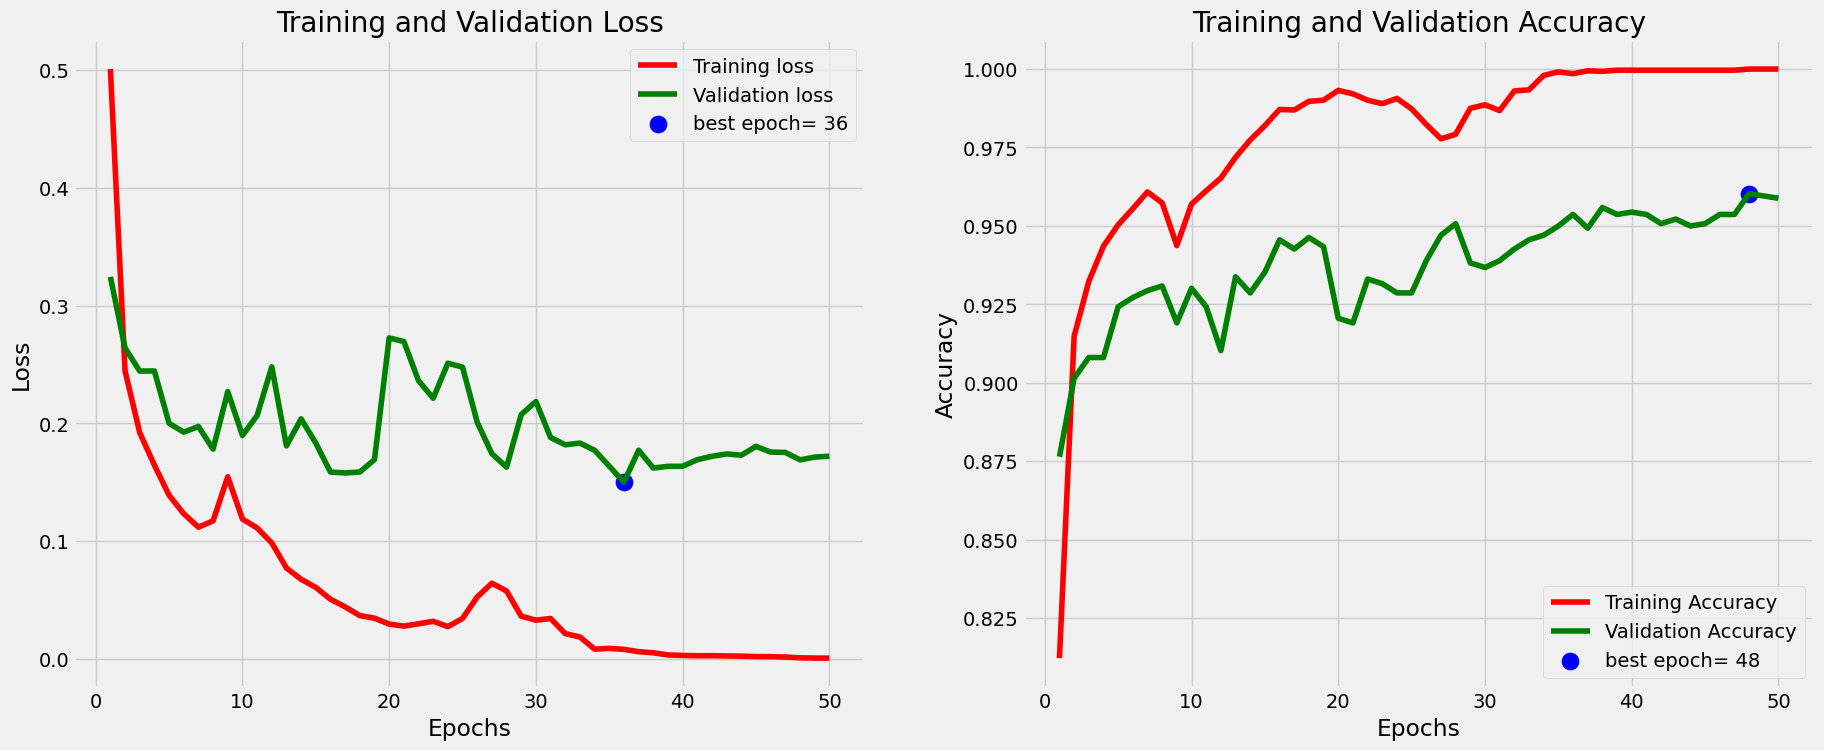

In [57]:
visualize(history_DenseNet121)

In [58]:
test_loss, test_acc = model_DenseNet121.evaluate(X_test_normalized, y_test_one_encoded)
print("Test Accuracy: {:.2f}%".format(test_acc * 100)) 
print("Test Loss: {:.2f}%".format(test_loss * 100))

43/43 ━━━━━━━━━━━━━━━━━━━━ 15s 351ms/step - accuracy: 0.9632 - loss: 0.1383
Test Accuracy: 95.88%
Test Loss: 17.14%


In [59]:
y_pred = model_DenseNet121.predict(X_test_normalized)
y_pred = np.argmax(y_pred,axis=1)

43/43 ━━━━━━━━━━━━━━━━━━━━ 18s 391ms/step


In [60]:
y_test_new = np.argmax(y_test_one_encoded,axis=1)

In [61]:
print(classification_report(y_test_new,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.94      0.94       340
           1       0.92      0.90      0.91       292
           2       0.98      0.99      0.99       378
           3       0.98      1.00      0.99       349

    accuracy                           0.96      1359
   macro avg       0.96      0.96      0.96      1359
weighted avg       0.96      0.96      0.96      1359



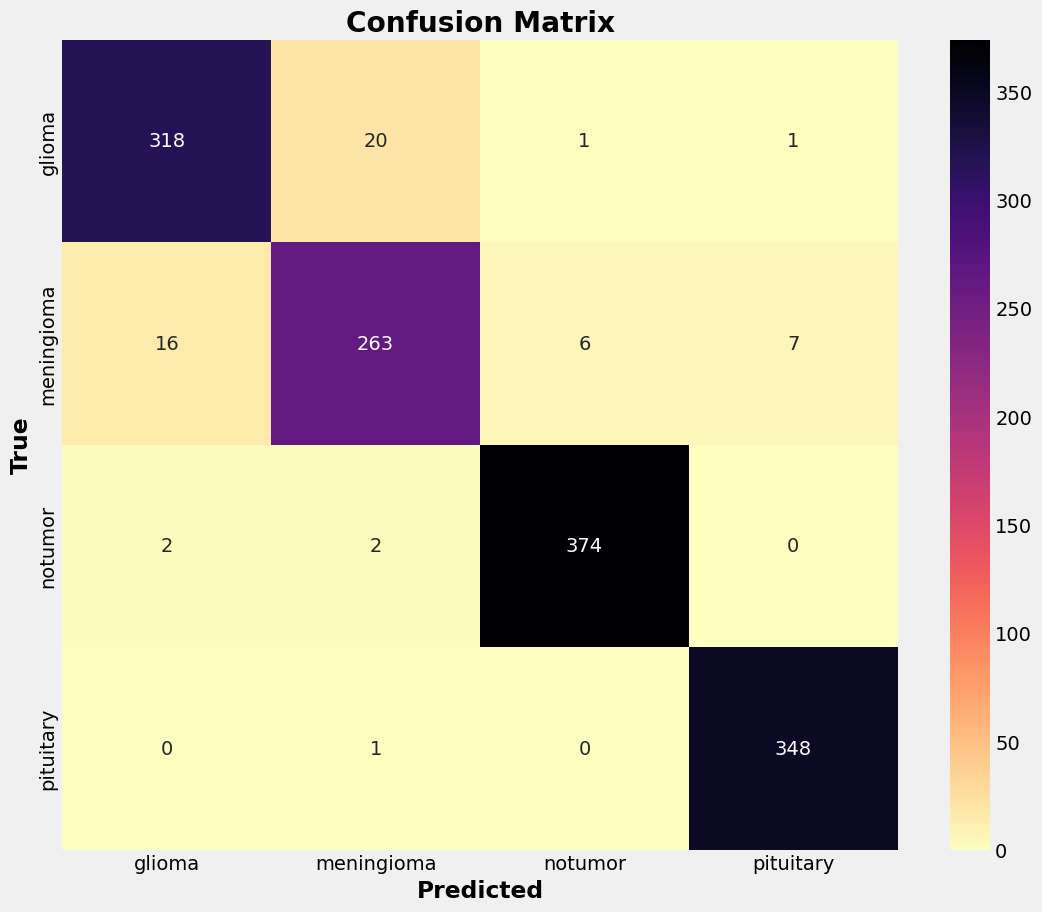

In [62]:
conf_matrix = confusion_matrix(y_test_new,y_pred) # x=y_test_new, y=y_pred

plt.figure(figsize=(12, 10))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='magma_r', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted', fontweight='bold')
plt.ylabel('True', fontweight='bold')
plt.title('Confusion Matrix', fontweight='bold')
plt.show() 

In [63]:
# saving the model 
from keras.saving import save_model
save_model(model_DenseNet121, 'saved_model_DenseNet121_11.keras')  

In [45]:
# Loading model 
from keras.models import load_model 
model_modelDenseNet121 = load_model('saved_model_DenseNet121_11.keras')

In [46]:
from keras.models import Model 
second_last_layer_output = model_modelDenseNet121.layers[-2].output

feature_extractor_3 = Model(inputs=model_modelDenseNet121.input, outputs=second_last_layer_output)  

# feature_extractor_3.summary()

In [47]:
extracted_feature_DenseNet121 = feature_extractor_3.predict(X_train_normalized)

170/170 ━━━━━━━━━━━━━━━━━━━━ 64s 363ms/step


In [48]:
extracted_feature_DenseNet121.shape

(5436, 1024)

In [49]:
extracted_feature_DenseNet121_T = feature_extractor_3.predict(X_test_normalized)

43/43 ━━━━━━━━━━━━━━━━━━━━ 16s 375ms/step


In [50]:
extracted_feature_DenseNet121_T.shape

(1359, 1024)

## Feature Process

In [51]:
## X_train
print(extracted_feature_Xception.shape) 
print(extracted_feature_InceptionV3.shape) 
print(extracted_feature_DenseNet121.shape) 
print('///////////////////////////////////')
#X_test 
print(extracted_feature_Xception_T.shape) 
print(extracted_feature_InceptionV3_T.shape) 
print(extracted_feature_DenseNet121_T.shape) 

(5436, 1024)
(5436, 1024)
(5436, 1024)
///////////////////////////////////
(1359, 1024)
(1359, 1024)
(1359, 1024)


In [52]:
concatenated_features_Training = np.concatenate((extracted_feature_Xception, 
                                        extracted_feature_InceptionV3, 
                                        extracted_feature_DenseNet121), axis=1)

# Check the shape of the concatenated features 
concatenated_features_Testing = np.concatenate((extracted_feature_Xception_T, 
                                        extracted_feature_InceptionV3_T, 
                                        extracted_feature_DenseNet121_T), axis=1)

print("Features Shape for training:", concatenated_features_Training.shape) 
print("Features Shape for testing:", concatenated_features_Testing.shape) 

Features Shape for training: (5436, 3072)
Features Shape for testing: (1359, 3072)


## ML Classifiers

In [53]:
#Libraries 
#ML classifiers
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier

In [54]:
print(concatenated_features_Training.shape) # X_train 
print(y_train.shape) 
# convert to 2-D aray 
print(concatenated_features_Testing.shape) 
print(y_test.shape)

(5436, 3072)
(5436,)
(1359, 3072)
(1359,)


## RF --------------------------------------------------------------

In [55]:
starting_time = time.time()   

random_forest_classifier = RandomForestClassifier(n_estimators=100000, max_depth=100000)  
random_forest_classifier.fit(concatenated_features_Training, y_train)

# Evaluate Random Forest classifier
accuracy_RF = random_forest_classifier.score(concatenated_features_Testing, y_test)
print("Accuracy of RF:", accuracy_RF)   

ending_time = time.time()   

total_run_time = ending_time - starting_time
print("Total runtime of model:", total_run_time/60, "Min.") 

Accuracy of RF: 0.9654157468727005
Total runtime of model: 90.53293784459431 Min.


In [56]:
# Predict the labels for the test set
y_pred_RF = random_forest_classifier.predict(concatenated_features_Testing)

# Generate the classification report
report = classification_report(y_test, y_pred_RF)

# Print the classification report
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

      glioma       0.96      0.94      0.95       340
  meningioma       0.92      0.92      0.92       292
     notumor       0.99      0.99      0.99       378
   pituitary       0.98      0.99      0.99       349

    accuracy                           0.97      1359
   macro avg       0.96      0.96      0.96      1359
weighted avg       0.97      0.97      0.97      1359



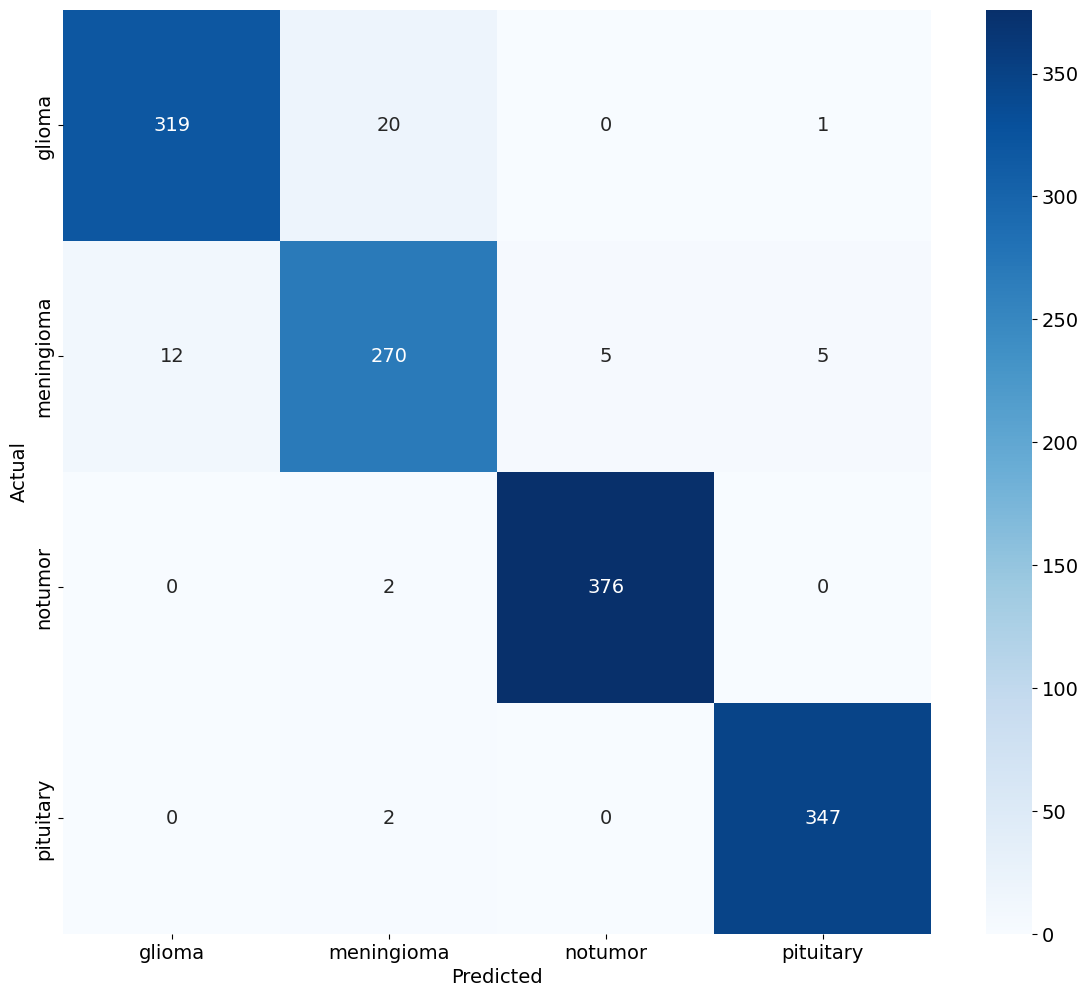

In [57]:
# Plotting the confusion matrix as a heatmap 
cm = confusion_matrix(y_test, y_pred_RF) 

plt.figure(figsize=(14, 12))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## LR ---------------------------------------------------------------------

In [58]:
starting_time = time.time()   

logistic_regression_classifier = LogisticRegression(multi_class="multinomial")  
logistic_regression_classifier.fit(concatenated_features_Training, y_train)   

#Evaluate LR classifier
accuracy_LR = logistic_regression_classifier.score(concatenated_features_Testing, y_test)
print("Accuracy of LR:", accuracy_LR)  

ending_time = time.time()  

total_run_time = ending_time - starting_time
print("Total runtime of model:", total_run_time/60, "Min.") 

Accuracy of LR: 0.9698307579102281
Total runtime of model: 0.003679339090983073 Min.


In [59]:
# Predict the labels for the test set
y_pred_LR = logistic_regression_classifier.predict(concatenated_features_Testing)

# Generate the classification report
report = classification_report(y_test, y_pred_LR)

# Print the classification report
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

      glioma       0.96      0.95      0.96       340
  meningioma       0.94      0.92      0.93       292
     notumor       0.99      0.99      0.99       378
   pituitary       0.98      1.00      0.99       349

    accuracy                           0.97      1359
   macro avg       0.97      0.97      0.97      1359
weighted avg       0.97      0.97      0.97      1359



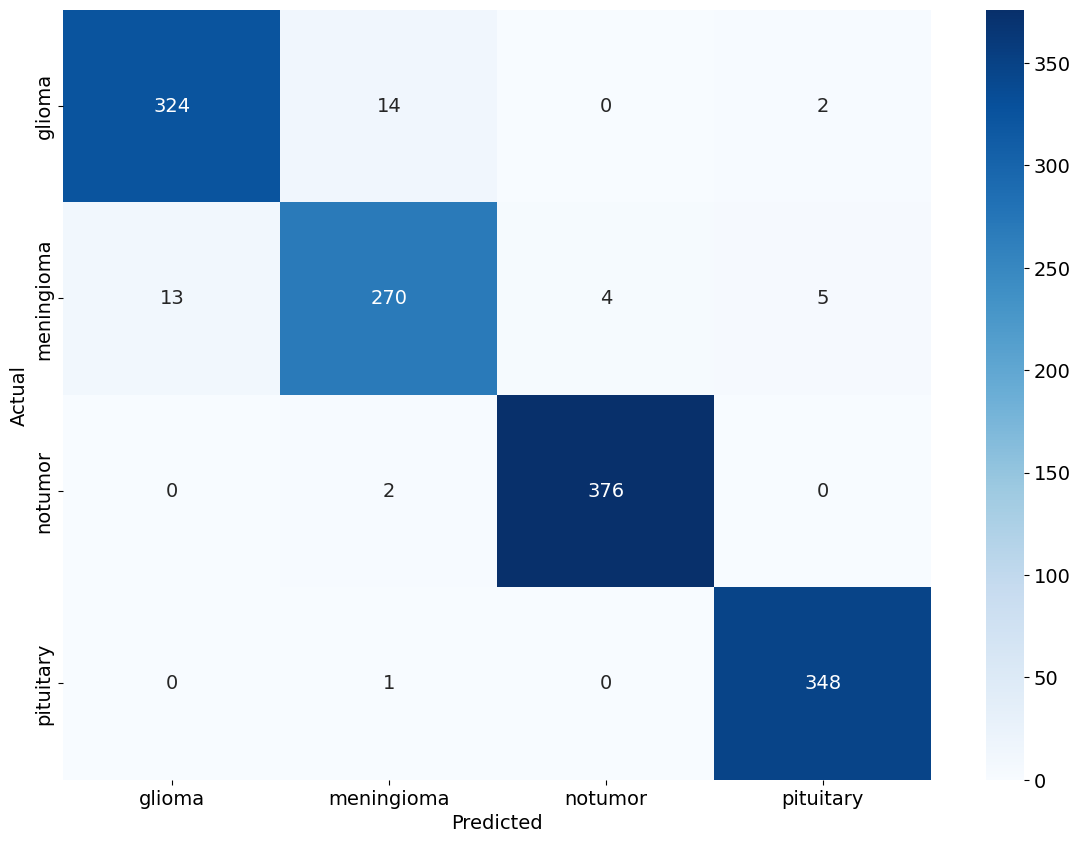

In [60]:
# Plotting the confusion matrix as a heatmap 
cm = confusion_matrix(y_test, y_pred_LR) 

plt.figure(figsize=(14, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## KNN -------------------------------------------------------------

In [61]:
starting_time = time.time()   

knn_classifier = KNeighborsClassifier(n_neighbors=4)  
knn_classifier.fit(concatenated_features_Training, y_train)

# Evaluate KNN classifier
accuracy_KNN = knn_classifier.score(concatenated_features_Testing, y_test)
print("Accuracy of KNN:", accuracy_KNN) 

ending_time = time.time()  

total_run_time = ending_time - starting_time
print("Total runtime of model:", total_run_time/60, "Min.") 

Accuracy of KNN: 0.9713024282560706
Total runtime of model: 0.009497622648874918 Min.


In [62]:
# Predict the labels for the test set
y_pred_KNN = knn_classifier.predict(concatenated_features_Testing)

# Generate the classification report
report = classification_report(y_test, y_pred_KNN)

# Print the classification report
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

      glioma       0.96      0.96      0.96       340
  meningioma       0.94      0.93      0.94       292
     notumor       0.98      0.99      0.99       378
   pituitary       0.99      1.00      0.99       349

    accuracy                           0.97      1359
   macro avg       0.97      0.97      0.97      1359
weighted avg       0.97      0.97      0.97      1359



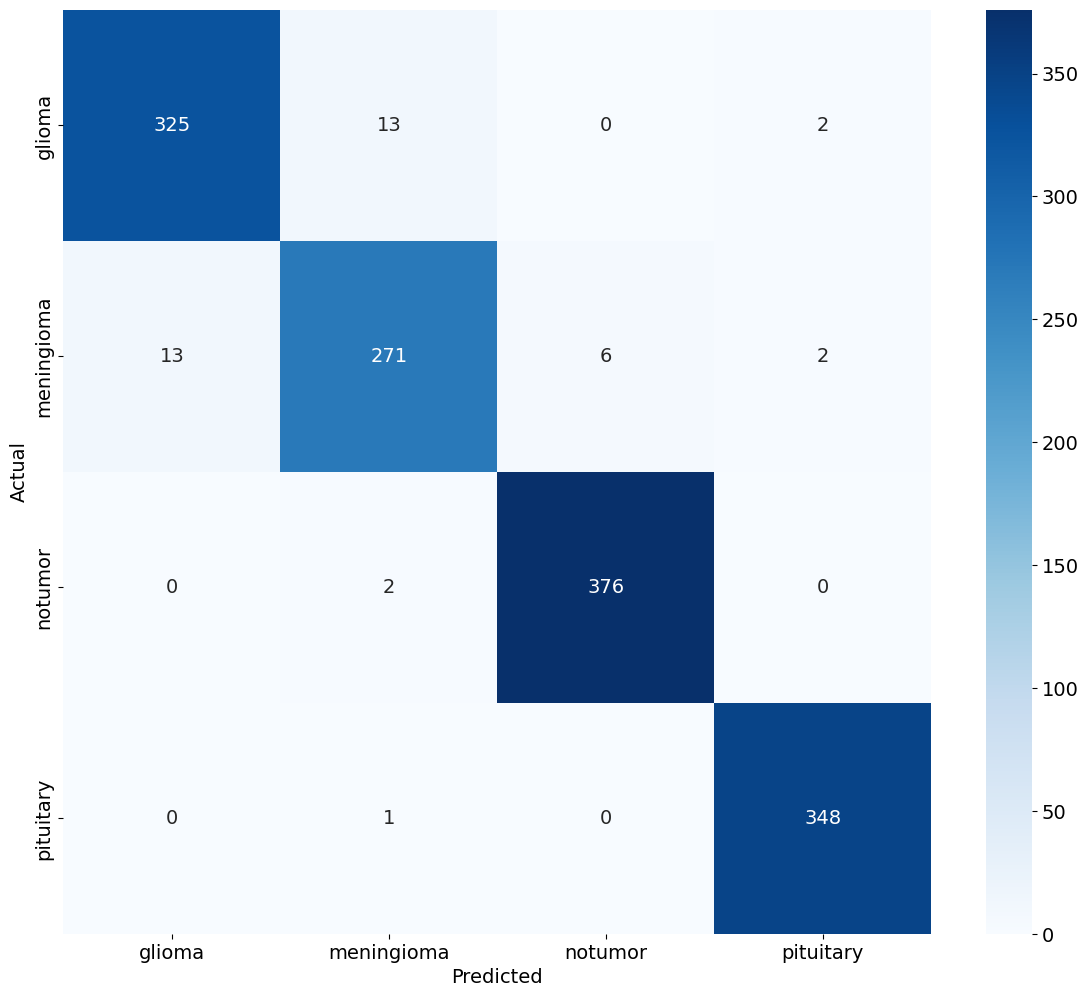

In [63]:
# Plotting the confusion matrix as a heatmap 
cm = confusion_matrix(y_test, y_pred_KNN) 

plt.figure(figsize=(14, 12))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## SVM -------------------------------------------------------------

In [64]:
starting_time = time.time()  
# Train SVM classifier
svm_classifier = SVC(kernel='linear') 
svm_classifier.fit(concatenated_features_Training, y_train)

# Evaluate SVM classifier
accuracy_Linear = svm_classifier.score(concatenated_features_Testing, y_test)
print("Accuracy of Linear:", accuracy_Linear)   

ending_time = time.time()  
  
total_run_time = ending_time - starting_time
print("Total runtime of model:", total_run_time/60, "Min.") 

Accuracy of Linear: 0.9713024282560706
Total runtime of model: 0.021925588448842365 Min.


In [65]:
# Predict the labels for the test set
y_pred_SVM_L = svm_classifier.predict(concatenated_features_Testing)

# Generate the classification report
report = classification_report(y_test, y_pred_SVM_L)

# Print the classification report
print("Classification Report for SVM_Linear:")
print(report)

Classification Report for SVM_Linear:
              precision    recall  f1-score   support

      glioma       0.96      0.96      0.96       340
  meningioma       0.94      0.92      0.93       292
     notumor       0.99      1.00      0.99       378
   pituitary       0.99      1.00      0.99       349

    accuracy                           0.97      1359
   macro avg       0.97      0.97      0.97      1359
weighted avg       0.97      0.97      0.97      1359



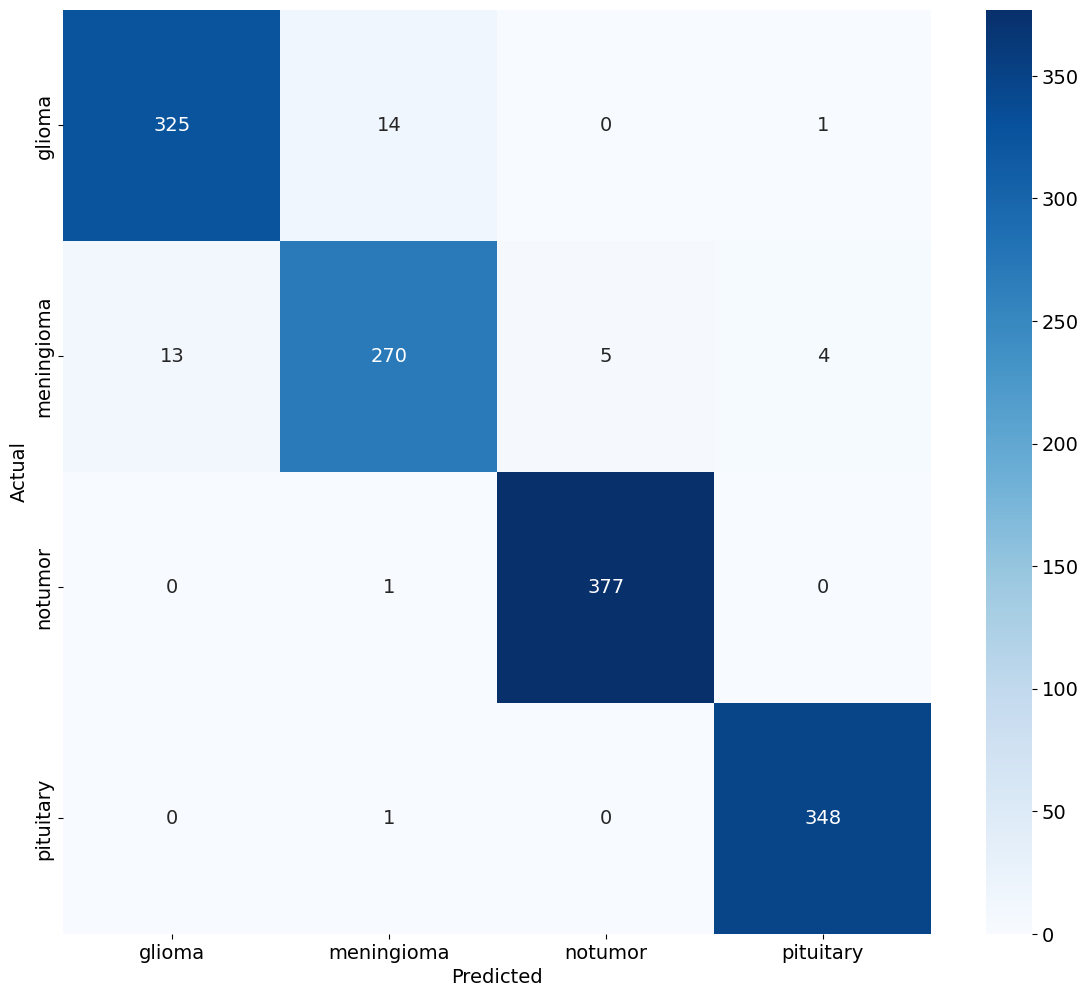

In [66]:
# Plotting the confusion matrix as a heatmap 
cm = confusion_matrix(y_test, y_pred_SVM_L) 

plt.figure(figsize=(14, 12))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## SVM -------------------------------------------------------------

In [67]:
starting_time = time.time()   
# Train SVM classifier
svm_classifier = SVC(kernel='rbf') # should I use different kernel ??? such as linear, sigmoid, and radial basis
svm_classifier.fit(concatenated_features_Training, y_train)

# Evaluate SVM classifier
accuracy_Rbf= svm_classifier.score(concatenated_features_Testing, y_test)
print("Accuracy of Rbf:", accuracy_Rbf)   

ending_time = time.time()  

total_run_time = ending_time - starting_time
print("Total runtime of model:", total_run_time/60, "Min") 

Accuracy of Rbf: 0.9720382634289919
Total runtime of model: 0.04829036792119344 Min


In [68]:
# Predict the labels for the test set
y_pred_SVM_R = svm_classifier.predict(concatenated_features_Testing)

# Generate the classification report
report = classification_report(y_test, y_pred_SVM_R)

# Print the classification report
print("Classification Report for SVM_Linear:")
print(report)

Classification Report for SVM_Linear:
              precision    recall  f1-score   support

      glioma       0.96      0.95      0.96       340
  meningioma       0.94      0.93      0.94       292
     notumor       0.99      1.00      0.99       378
   pituitary       0.99      1.00      0.99       349

    accuracy                           0.97      1359
   macro avg       0.97      0.97      0.97      1359
weighted avg       0.97      0.97      0.97      1359



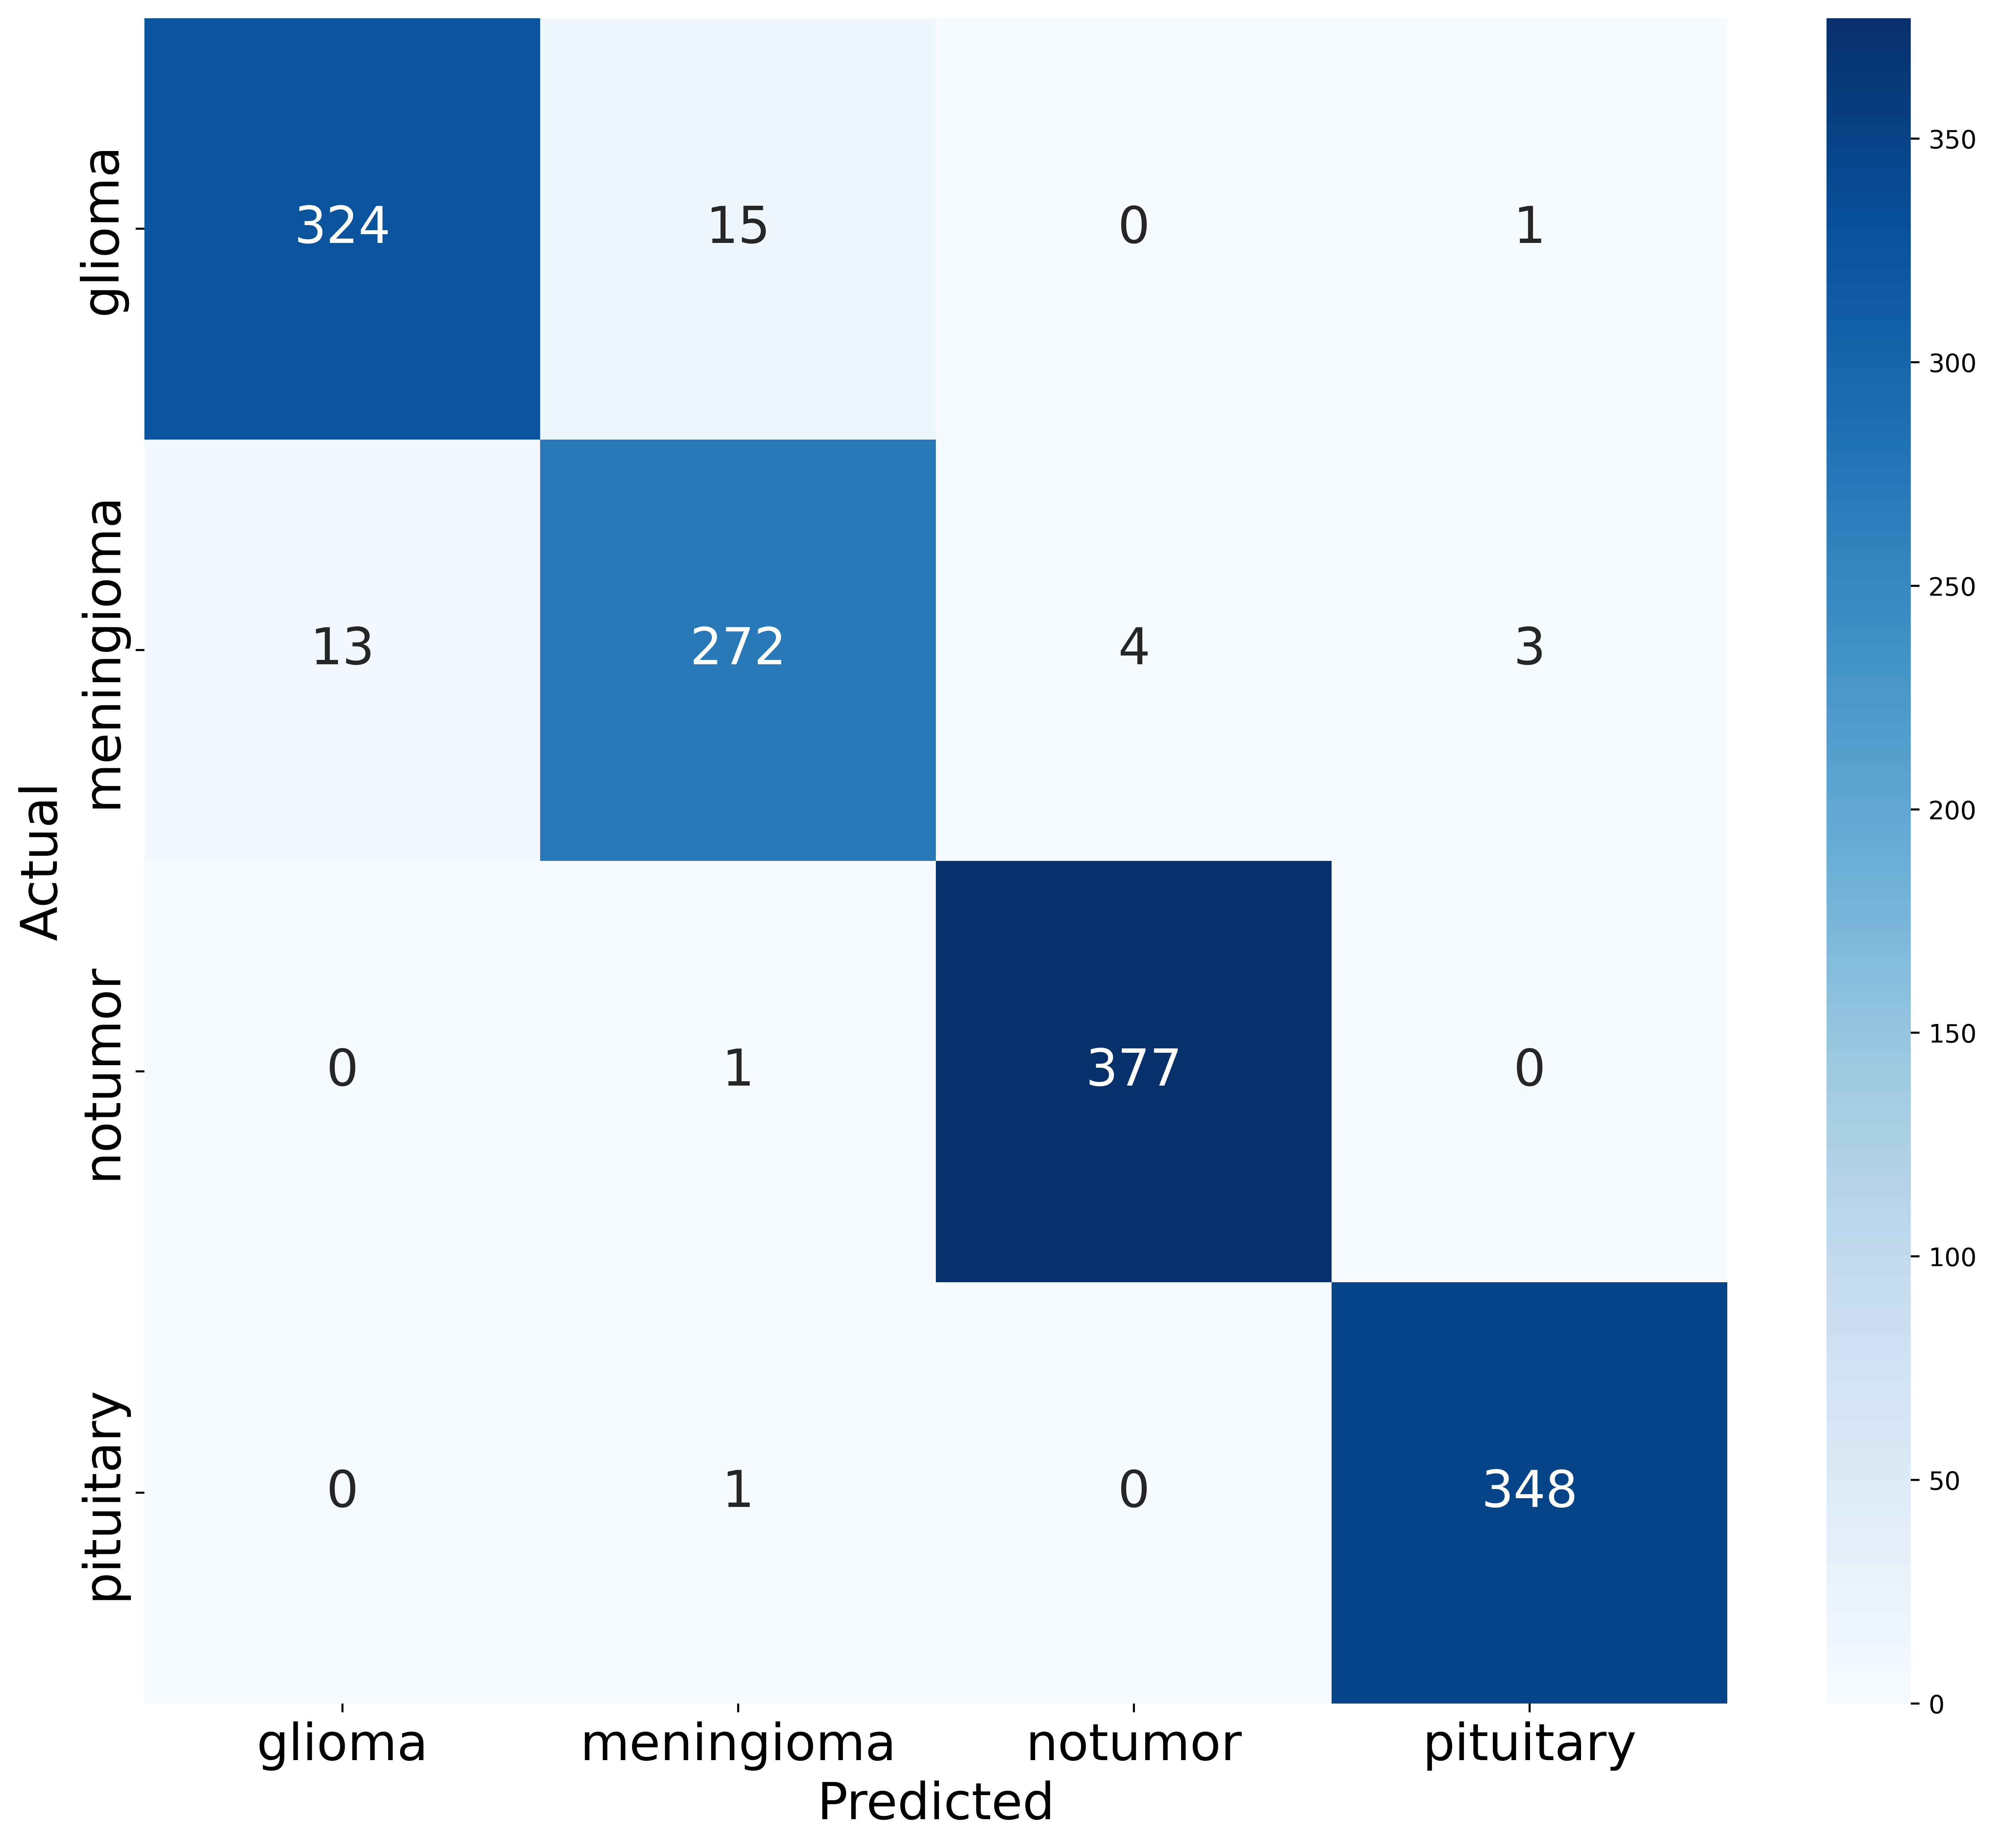

In [1]:
# Define class labels
labels = ['glioma', 'meningioma', 'notumor', 'pituitary']

# Define the confusion matrix data
confusion_matrix = np.array([[324,  15,   0,   1],
                            [  13, 272,  4,  3],
                            [  0,   1, 377,   0],
                            [  0,   1,   0, 348]])

# Plot confusion matrix
plt.figure(figsize=(14, 12), dpi=500)
sns.heatmap(confusion_matrix, annot=True, cmap='Blues', fmt='g', 
            xticklabels=labels, yticklabels=labels, annot_kws={"size": 25})

# Increase label font size
plt.xticks(fontsize=25)
plt.yticks(fontsize=25) 
plt.xlabel('Predicted', fontsize = 25)
plt.ylabel('Actual', fontsize = 25)
plt.show()

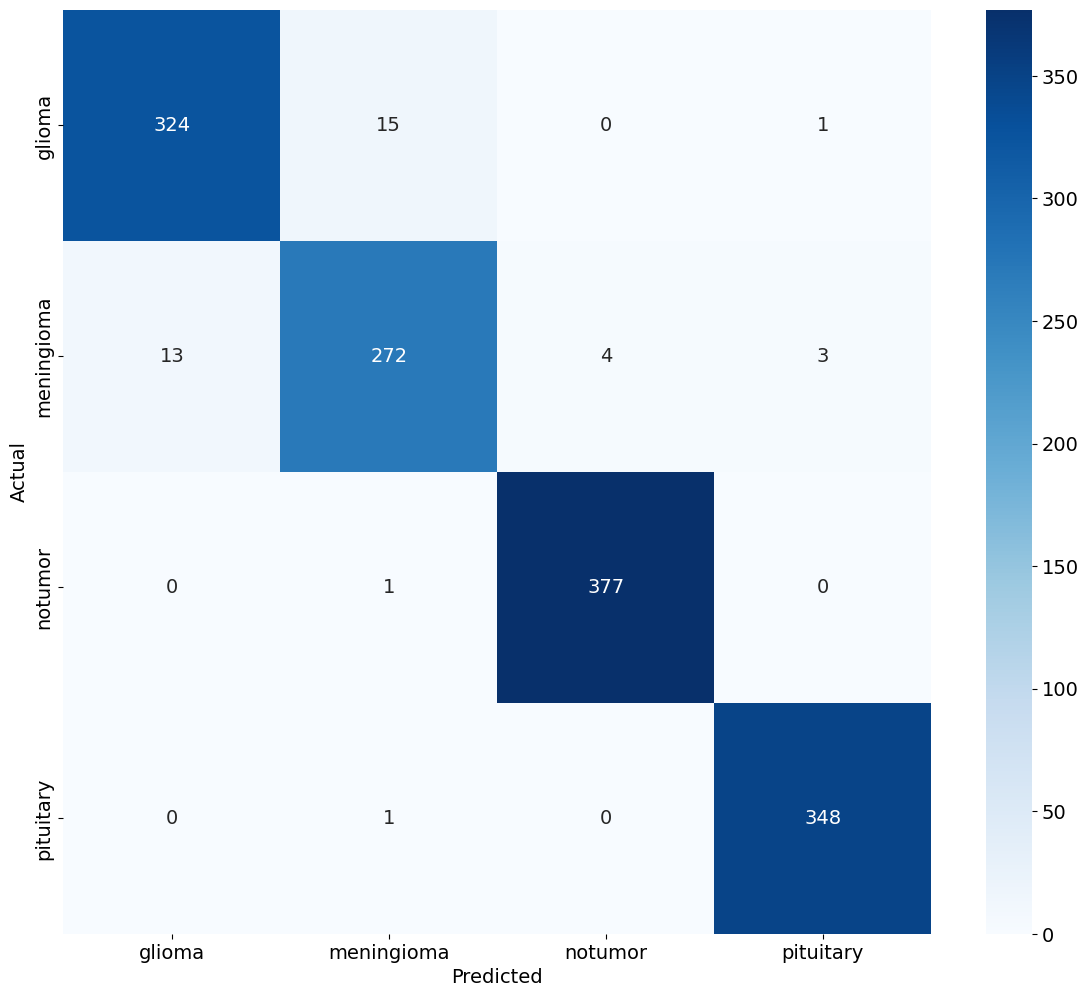

In [69]:
# Plotting the confusion matrix as a heatmap 
cm = confusion_matrix(y_test, y_pred_SVM_R) 

plt.figure(figsize=(14, 12))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## SVM --------------------------------------------------------------------------

In [70]:
starting_time = time.time()   

# Train SVM classifier
svm_classifier = SVC(kernel='sigmoid') # should I use different kernel ??? such as linear, sigmoid, and radial basis
svm_classifier.fit(concatenated_features_Training, y_train)

# Evaluate SVM classifier
accuracy_Sigmoid = svm_classifier.score(concatenated_features_Testing, y_test)
print("Accuracy of Sigmoid:", accuracy_Sigmoid)  

ending_time = time.time()    

total_run_time = ending_time - starting_time
print("Total runtime of model:", total_run_time/60, "Min.") 

Accuracy of Sigmoid: 0.9676232523914643
Total runtime of model: 0.03479958375295003 Min.


In [71]:
# Predict the labels for the test set
y_pred_SVM_S = svm_classifier.predict(concatenated_features_Testing)

# Generate the classification report
report = classification_report(y_test, y_pred_SVM_S)

# Print the classification report
print("Classification Report for SVM_Sigmoid:")
print(report)

Classification Report for SVM_Sigmoid:
              precision    recall  f1-score   support

      glioma       0.96      0.95      0.95       340
  meningioma       0.93      0.92      0.93       292
     notumor       0.98      1.00      0.99       378
   pituitary       0.98      1.00      0.99       349

    accuracy                           0.97      1359
   macro avg       0.97      0.96      0.97      1359
weighted avg       0.97      0.97      0.97      1359



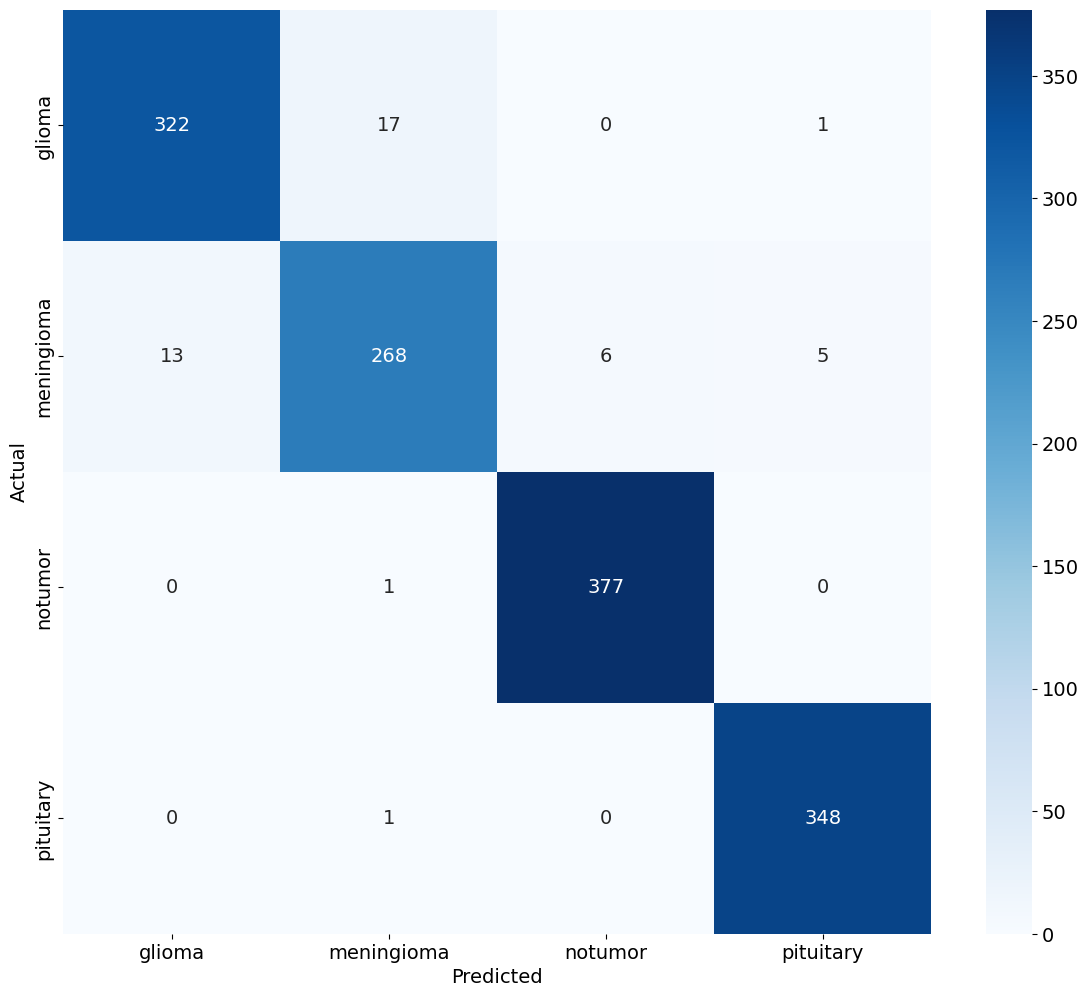

In [72]:
# Plotting the confusion matrix as a heatmap 
cm = confusion_matrix(y_test, y_pred_SVM_S) 

plt.figure(figsize=(14, 12))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()